# Projects 1. 다음 분기에 어떤 게임을 설계해야 할까?

#  1) 데이터 EDA, Feature Engineering

In [4]:
# 모듈 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler

In [5]:
# 파일 업로드
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [6]:
df = pd.read_csv('vgames2.csv')
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


### a) 결측치 확인 및 처리

In [7]:
df.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [8]:
df.shape

(16598, 10)

In [9]:
df.index.nunique()

16598

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [11]:
df.head(2).T

,0,1
Unnamed: 0,1,2
Name,Candace Kane's Candy Factory,The Munchables
Platform,DS,Wii
Year,2008.0,2009.0
Genre,Action,Action
Publisher,Destineer,Namco Bandai Games
NA_Sales,0.04,0.17
EU_Sales,0,0
JP_Sales,0,0
Other_Sales,0,0.01


In [12]:
df.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [13]:
df[df['Year'].isnull() | df['Genre'].isnull() | df['Publisher'].isnull()]

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,32,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
50,51,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
109,110,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
272,273,UK Truck Simulator,PC,2010.0,Simulation,NaN,0,0.03,0,0
273,274,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
...,...,...,...,...,...,...,...,...,...,...
16425,16426,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0
16431,16432,Cars: Mater-National Championship,X360,2007.0,NaN,THQ,0.13,0,0,0.01
16432,16433,Bejeweled 3,X360,NaN,Puzzle,Unknown,0.13,0,0,0.01
16555,16556,Apache: Air Assault,PC,2010.0,NaN,Just Flight,0,0.03,0,0.01


In [14]:
df.Platform.value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [15]:
df.Genre.value_counts(normalize=True)

Action          0.199722
Sports          0.141467
Misc            0.104786
Role-Playing    0.089618
Shooter         0.079043
Adventure       0.077351
Racing          0.075115
Platform        0.053420
Simulation      0.052272
Fighting        0.051184
Strategy        0.041093
Puzzle          0.034929
Name: Genre, dtype: float64

In [16]:
df.columns

Index(['Unnamed: 0', 'Name', 'Platform', 'Year', 'Genre', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')

In [17]:
df.dropna(subset=['Year'], how='any', axis='index', inplace=True)

In [18]:
df.isnull().sum()

Unnamed: 0      0
Name            0
Platform        0
Year            0
Genre          50
Publisher      36
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

In [19]:
df[df['Genre'].isnull()]

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
50,51,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
408,409,NBA Ballers,XB,2004.0,NaN,Midway Games,0.37,0.11,0,0.02
1328,1329,NFL Street,XB,2004.0,NaN,Electronic Arts,0.49,0.15,0,0.02
1582,1583,SingStar Singalong With Disney,PS2,2008.0,NaN,Sony Computer Entertainment,0,0.04,0,0.57
1971,1972,Pokemon X/Pokemon Y,3DS,2013.0,NaN,Nintendo,5170K,4.05,4.34,0.79
2043,2044,NASCAR Racing,PS,1996.0,NaN,Pioneer LDC,0.23,0.16,0,0.03
2497,2498,Jurassic Park III: Island Attack,GBA,2001.0,NaN,Konami Digital Entertainment,0.13,0.05,0,0
3353,3354,The Godfather: Dons Edition,PS3,2007.0,NaN,Electronic Arts,0.25,0.02,0,0.03
3363,3364,Ski-Doo Snowmobile Challenge,X360,2009.0,NaN,Valcon Games,0.03,0,0,0
3470,3471,Batman Beyond: Return of the Joker,N64,2000.0,NaN,Ubisoft,0.07,0.02,0,0


In [20]:
df.dropna(subset=['Genre'], how='any', axis='index', inplace=True)

In [21]:
df.isnull().sum()

Unnamed: 0      0
Name            0
Platform        0
Year            0
Genre           0
Publisher      36
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

In [22]:
nan_pub = df[df['Publisher'].isnull()]

In [23]:
df.Publisher.fillna('Unknown', inplace=True)

In [24]:
nan_pub

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
272,273,UK Truck Simulator,PC,2010.0,Simulation,NaN,0,0.03,0,0
1313,1314,All Grown Up!: Game Boy Advance Video Volume 1,GBA,2004.0,Misc,NaN,0.17,0.06,0,0
1560,1561,Teenage Mutant Ninja Turtles: Game Boy Advance...,GBA,2004.0,Misc,NaN,0.12,0.04,0,0
1789,1790,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.16,0.06,0,0
1961,1962,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0,0.01
3412,3413,Dance with Devils,PSV,2016.0,Action,NaN,0,0,0.01,0
3684,3685,Dragon Ball GT: Game Boy Advance Video Volume 1,GBA,2004.0,Misc,NaN,0.12,0.05,0,0
4367,4368,Strawberry Shortcake: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.11,0.04,0,0
5207,5208,Cartoon Network Collection: Game Boy Advance V...,GBA,2005.0,Misc,NaN,0.23,0.08,0,0.01
5245,5246,Cartoon Network Collection: Game Boy Advance V...,GBA,2005.0,Misc,NaN,0.11,0.04,0,0


In [25]:
df[df.Name == 'UK Truck Simulator']

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
272,273,UK Truck Simulator,PC,2010.0,Simulation,Unknown,0,0.03,0,0


In [26]:
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [27]:
df.drop(columns='Unnamed: 0', inplace=True)

In [28]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [29]:
df = df.reset_index(drop=True)

In [30]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16272,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16273,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16274,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16275,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [31]:
df[df.duplicated()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16277 entries, 0 to 16276
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16277 non-null  object 
 1   Platform     16277 non-null  object 
 2   Year         16277 non-null  float64
 3   Genre        16277 non-null  object 
 4   Publisher    16277 non-null  object 
 5   NA_Sales     16277 non-null  object 
 6   EU_Sales     16277 non-null  object 
 7   JP_Sales     16277 non-null  object 
 8   Other_Sales  16277 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


### b) 이상치 확인 및 처리

In [33]:
df.Year = df.Year.astype(str).str[:-2]

In [34]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16272,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16273,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16274,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16275,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16277 entries, 0 to 16276
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16277 non-null  object
 1   Platform     16277 non-null  object
 2   Year         16277 non-null  object
 3   Genre        16277 non-null  object
 4   Publisher    16277 non-null  object
 5   NA_Sales     16277 non-null  object
 6   EU_Sales     16277 non-null  object
 7   JP_Sales     16277 non-null  object
 8   Other_Sales  16277 non-null  object
dtypes: object(9)
memory usage: 1.1+ MB


In [36]:
df['NA_Sales'].describe()

count     16277
unique      489
top           0
freq       4375
Name: NA_Sales, dtype: object

In [37]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16272,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16273,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16274,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16275,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [38]:
df.Year = df.Year.astype('int')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16277 entries, 0 to 16276
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16277 non-null  object
 1   Platform     16277 non-null  object
 2   Year         16277 non-null  int64 
 3   Genre        16277 non-null  object
 4   Publisher    16277 non-null  object
 5   NA_Sales     16277 non-null  object
 6   EU_Sales     16277 non-null  object
 7   JP_Sales     16277 non-null  object
 8   Other_Sales  16277 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.1+ MB


In [40]:
df_s_v = df.sort_values(by=['Year'])

In [41]:
df[df.Year < 1000] 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
72,Age of Empires III: Complete Collection,PC,9,Strategy,Microsoft Game Studios,0.01,0.12,0,0.03
79,Treasures of the Deep,PS,97,Action,Namco Bandai Games,0.1,0.07,0,0.01
210,NASCAR Unleashed,PS3,11,Racing,Activision,0.09,0,0,0.01
300,Kung Fu Panda: Showdown of Legendary Legends,PS3,15,Action,Little Orbit,0,0.02,0,0
759,NASCAR Thunder 2004,PS2,3,Racing,Electronic Arts,0.53,0.41,0,0.14
...,...,...,...,...,...,...,...,...,...
15676,Sugoi Hebereke,SNES,94,Fighting,Sunsoft,0,0,0.02,0
15792,Fab 5 Soccer,DS,8,Sports,Destineer,0.01,0,0,0
15837,Dragon Ball Z: Burst Limit,X360,8,Fighting,Atari,0.24,0.18,0.03,0.05
16078,Point Blank 3,PS,0,Shooter,Namco Bandai Games,0.01,0.01,0,0


In [42]:
df[df.Year < 100]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
72,Age of Empires III: Complete Collection,PC,9,Strategy,Microsoft Game Studios,0.01,0.12,0,0.03
79,Treasures of the Deep,PS,97,Action,Namco Bandai Games,0.1,0.07,0,0.01
210,NASCAR Unleashed,PS3,11,Racing,Activision,0.09,0,0,0.01
300,Kung Fu Panda: Showdown of Legendary Legends,PS3,15,Action,Little Orbit,0,0.02,0,0
759,NASCAR Thunder 2004,PS2,3,Racing,Electronic Arts,0.53,0.41,0,0.14
...,...,...,...,...,...,...,...,...,...
15676,Sugoi Hebereke,SNES,94,Fighting,Sunsoft,0,0,0.02,0
15792,Fab 5 Soccer,DS,8,Sports,Destineer,0.01,0,0,0
15837,Dragon Ball Z: Burst Limit,X360,8,Fighting,Atari,0.24,0.18,0.03,0.05
16078,Point Blank 3,PS,0,Shooter,Namco Bandai Games,0.01,0.01,0,0


In [43]:
df2000 = df[df.Year < 10]

In [44]:
df2000

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
72,Age of Empires III: Complete Collection,PC,9,Strategy,Microsoft Game Studios,0.01,0.12,0,0.03
759,NASCAR Thunder 2004,PS2,3,Racing,Electronic Arts,0.53,0.41,0,0.14
1002,Wolfenstein,PC,9,Shooter,Activision,0.01,0.03,0,0.01
1205,Ratchet & Clank: Going Commando,PS2,3,Platform,Sony Computer Entertainment,1.44,0.83,0.26,0.25
1345,LEGO Star Wars II: The Original Trilogy,PS2,6,Action,LucasArts,1.85,0.64,0.01,0.19
1390,Rogue Warrior,PS3,9,Shooter,Bethesda Softworks,0.11,0.02,0,0.01
1659,SpongeBob SquarePants featuring Nicktoons: Glo...,PS2,8,Action,THQ,0.29,0.22,0,0.07
2211,SplashDown,PS2,1,Racing,Atari,0.34,0.27,0,0.09
2413,SOCOM: U.S. Navy SEALs Fireteam Bravo 2,PSP,6,Shooter,Sony Computer Entertainment,0.81,0.11,0,0.13
2426,Splat Renegade Paintball,XB,5,Sports,Take-Two Interactive,0.04,0.01,0,0


In [45]:
df_2000 = df[df.Year <80]

In [46]:
df_2000.Year = df_2000.Year + 2000

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [47]:
df_2000

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
72,Age of Empires III: Complete Collection,PC,2009,Strategy,Microsoft Game Studios,0.01,0.12,0,0.03
210,NASCAR Unleashed,PS3,2011,Racing,Activision,0.09,0,0,0.01
300,Kung Fu Panda: Showdown of Legendary Legends,PS3,2015,Action,Little Orbit,0,0.02,0,0
759,NASCAR Thunder 2004,PS2,2003,Racing,Electronic Arts,0.53,0.41,0,0.14
1002,Wolfenstein,PC,2009,Shooter,Activision,0.01,0.03,0,0.01
...,...,...,...,...,...,...,...,...,...
15308,Rally Fusion: Race of Champions,PS2,2002,Racing,Activision,0.06,0.05,0,0.02
15528,Theatrhythm Dragon Quest,3DS,2015,Misc,Square Enix,0,0,0.15,0
15792,Fab 5 Soccer,DS,2008,Sports,Destineer,0.01,0,0,0
15837,Dragon Ball Z: Burst Limit,X360,2008,Fighting,Atari,0.24,0.18,0.03,0.05


In [48]:
df_1900 = df[(df.Year >= 80) & (df.Year <100)]

In [49]:
df_1900.Year = df_1900.Year + 1900 

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [50]:
df_a = df[df.Year >= 100]

In [51]:
df = pd.concat([df_1900, df_2000, df_a])

In [52]:
df.reset_index(drop=True)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Treasures of the Deep,PS,1997,Action,Namco Bandai Games,0.1,0.07,0,0.01
1,Mini-Yonku Shining Scorpion: Let's & Go!!,SNES,1996,Racing,ASCII Entertainment,0,0,0.9,0
2,Casper,PS,1996,Adventure,Interplay,0.46,0.31,0,0.05
3,Glover,N64,1998,Platform,Hasbro Interactive,0.72,0.17,0,0.01
4,Adventure Island,NES,1986,Platform,Hudson Soft,0,0,1.05,0
...,...,...,...,...,...,...,...,...,...
16272,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16273,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16274,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16275,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [53]:
df.shape

(16277, 9)

In [54]:
df_clean = df.copy()

In [55]:
df_clean.shape

(16277, 9)

In [56]:
df_clean['NA_Sales'] = df_clean['NA_Sales'].str.replace('M', '')

In [57]:
df_clean['NA_Sales'] = df_clean['NA_Sales'].str.replace('K', '000').astype('float')

In [58]:
df_clean['EU_Sales'] = df_clean['EU_Sales'].str.replace('M', '')
df_clean['EU_Sales'] = df_clean['EU_Sales'].str.replace('K', '000').astype('float')

In [59]:
df_clean['JP_Sales'] = df_clean['JP_Sales'].str.replace('M', '')
df_clean['JP_Sales'] = df_clean['JP_Sales'].str.replace('K', '000').astype('float')

In [60]:
df_clean['Other_Sales'] = df_clean['Other_Sales'].str.replace('M', '')
df_clean['Other_Sales'] = df_clean['Other_Sales'].str.replace('K', '000').astype('float')

In [61]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16277 entries, 79 to 16276
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16277 non-null  object 
 1   Platform     16277 non-null  object 
 2   Year         16277 non-null  int64  
 3   Genre        16277 non-null  object 
 4   Publisher    16277 non-null  object 
 5   NA_Sales     16277 non-null  float64
 6   EU_Sales     16277 non-null  float64
 7   JP_Sales     16277 non-null  float64
 8   Other_Sales  16277 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.2+ MB


In [62]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
79,Treasures of the Deep,PS,1997,Action,Namco Bandai Games,0.1,0.07,0,0.01
895,Mini-Yonku Shining Scorpion: Let's & Go!!,SNES,1996,Racing,ASCII Entertainment,0,0,0.9,0
2388,Casper,PS,1996,Adventure,Interplay,0.46,0.31,0,0.05
3429,Glover,N64,1998,Platform,Hasbro Interactive,0.72,0.17,0,0.01
4281,Adventure Island,NES,1986,Platform,Hudson Soft,0,0,1.05,0
...,...,...,...,...,...,...,...,...,...
16272,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16273,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16274,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16275,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [63]:
df_clean['NA_Sales'][df_clean['NA_Sales'] >= 1000] = df_clean['NA_Sales'][df_clean['NA_Sales'] >= 1000] /1000000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
df_clean['NA_Sales'][df_clean['NA_Sales'] >= 1000] /1000000

Series([], Name: NA_Sales, dtype: float64)

In [65]:
df_clean['NA_Sales']

79       0.10
895      0.00
2388     0.46
3429     0.72
4281     0.00
         ... 
16272    0.15
16273    0.01
16274    0.44
16275    0.05
16276    0.00
Name: NA_Sales, Length: 16277, dtype: float64

In [66]:
df_clean['EU_Sales'][df_clean['EU_Sales'] >= 1000] = df_clean['EU_Sales'][df_clean['EU_Sales'] >= 1000] /1000000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
df_clean['JP_Sales'][df_clean['JP_Sales'] >= 1000] = df_clean['JP_Sales'][df_clean['JP_Sales'] >= 1000] /1000000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
df_clean['Other_Sales'][df_clean['Other_Sales'] >= 1000] = df_clean['Other_Sales'][df_clean['Other_Sales'] >= 1000] /1000000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
df_clean.NA_Sales = df_clean.NA_Sales * 1000000

In [70]:
df_clean.EU_Sales = df_clean.EU_Sales * 1000000
df_clean.JP_Sales = df_clean.JP_Sales * 1000000
df_clean.Other_Sales = df_clean.Other_Sales * 1000000

In [71]:
df_clean.NA_Sales = df_clean.NA_Sales.astype('int')
df_clean.EU_Sales = df_clean.EU_Sales.astype('int')
df_clean.JP_Sales = df_clean.JP_Sales.astype('int')
df_clean.Other_Sales = df_clean.Other_Sales.astype('int')

In [72]:
df_clean = df_clean.reset_index(drop=True)

In [73]:
df_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Treasures of the Deep,PS,1997,Action,Namco Bandai Games,100000,70000,0,10000
1,Mini-Yonku Shining Scorpion: Let's & Go!!,SNES,1996,Racing,ASCII Entertainment,0,0,900000,0
2,Casper,PS,1996,Adventure,Interplay,460000,310000,0,50000
3,Glover,N64,1998,Platform,Hasbro Interactive,720000,170000,0,10000
4,Adventure Island,NES,1986,Platform,Hudson Soft,0,0,1050000,0
...,...,...,...,...,...,...,...,...,...
16272,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,40000,0,10000
16273,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000,0,0,0
16274,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000
16275,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000,50000,250000,30000


In [74]:
df_clean['Year'].sort_values()

14005    1980
14738    1980
12904    1980
9979     1980
9104     1980
         ... 
5401     2016
5273     2017
9966     2017
14951    2017
6836     2020
Name: Year, Length: 16277, dtype: int64

In [75]:
df.Platform.value_counts(normalize=True)

DS      0.130798
PS2     0.130307
PS3     0.079806
Wii     0.078884
X360    0.075690
PSP     0.073294
PS      0.072802
PC      0.057750
GBA     0.049702
XB      0.049088
GC      0.033237
3DS     0.030657
PSV     0.025250
PS4     0.020581
N64     0.019230
SNES    0.014683
XOne    0.013025
SAT     0.010628
WiiU    0.008785
2600    0.007065
NES     0.006021
GB      0.005959
DC      0.003195
GEN     0.001659
NG      0.000737
SCD     0.000369
WS      0.000369
3DO     0.000184
TG16    0.000123
GG      0.000061
PCFX    0.000061
Name: Platform, dtype: float64

In [76]:
df_clean[df_clean.Platform == 'DS'].sort_values(by='Year')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8630,Strongest Tokyo University Shogi DS,DS,1985,Action,Mycom,0,0,20000,0
2187,The Urbz: Sims in the City (all regions sales),DS,2004,Simulation,Electronic Arts,400000,10000,20000,0
12288,Feel the Magic XY/XX,DS,2004,Puzzle,Sega,170000,0,100000,20000
8404,Spider-Man 2,DS,2004,Action,Activision,410000,20000,30000,40000
12257,Super Mario 64,DS,2004,Platform,Nintendo,5080000,3110000,1250000,980000
...,...,...,...,...,...,...,...,...,...
11850,Moshi Monsters: Katsuma Unleashed,DS,2013,Action,Activision,0,130000,0,20000
13608,LEGO Legends of Chima: Laval's Journey,DS,2013,Adventure,Unknown,0,30000,0,0
14846,The Croods: Prehistoric Party!,DS,2013,Misc,D3Publisher,30000,40000,0,10000
14661,Winx Club: Saving Alfea,DS,2014,Action,Namco Bandai Games,20000,0,0,0


In [77]:
df_clean.Platform = df_clean.Platform.str.replace('3DS', 'Nintendo 3DS')

In [78]:
df_clean.Platform = df_clean.Platform.str.replace('DS', 'Nintendo DS')

In [79]:
df_clean.Platform = df_clean.Platform.str.replace('Nintendo 3Nintendo DS', 'Nintendo 3DS')

In [80]:
df_clean 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Treasures of the Deep,PS,1997,Action,Namco Bandai Games,100000,70000,0,10000
1,Mini-Yonku Shining Scorpion: Let's & Go!!,SNES,1996,Racing,ASCII Entertainment,0,0,900000,0
2,Casper,PS,1996,Adventure,Interplay,460000,310000,0,50000
3,Glover,N64,1998,Platform,Hasbro Interactive,720000,170000,0,10000
4,Adventure Island,NES,1986,Platform,Hudson Soft,0,0,1050000,0
...,...,...,...,...,...,...,...,...,...
16272,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,40000,0,10000
16273,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000,0,0,0
16274,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000
16275,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000,50000,250000,30000


In [81]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
79,Treasures of the Deep,PS,1997,Action,Namco Bandai Games,0.1,0.07,0,0.01
895,Mini-Yonku Shining Scorpion: Let's & Go!!,SNES,1996,Racing,ASCII Entertainment,0,0,0.9,0
2388,Casper,PS,1996,Adventure,Interplay,0.46,0.31,0,0.05
3429,Glover,N64,1998,Platform,Hasbro Interactive,0.72,0.17,0,0.01
4281,Adventure Island,NES,1986,Platform,Hudson Soft,0,0,1.05,0
...,...,...,...,...,...,...,...,...,...
16272,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16273,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16274,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16275,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [82]:
df_clean[df_clean.Platform == '3DS'].sort_values(by='Year')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [83]:
nintendo_total = df_clean[df_clean.Publisher == 'Nintendo'].sort_values(by='Year')
nintendo_total

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9943,Mario Bros.,NES,1983,Platform,Nintendo,510000,120000,1630000,20000
555,Baseball,NES,1983,Sports,Nintendo,730000,100000,2350000,20000
10411,Donkey Kong,NES,1983,Platform,Nintendo,230000,50000,840000,10000
10496,Donkey Kong Jr.,NES,1983,Platform,Nintendo,330000,70000,700000,10000
10497,Mahjong,NES,1983,Misc,Nintendo,10000,0,2130000,0
...,...,...,...,...,...,...,...,...,...
5618,Teddy Together,Nintendo 3DS,2016,Simulation,Nintendo,0,20000,0,0
7494,Culdcept Revolt,Nintendo 3DS,2016,Strategy,Nintendo,0,0,50000,0
1542,Kirby: Planet Robobot,Nintendo 3DS,2016,Action,Nintendo,260000,100000,440000,40000
11519,Mario & Sonic at the Rio 2016 Olympic Games,WiiU,2016,Action,Nintendo,30000,110000,100000,10000


In [84]:
nintendo_total[nintendo_total.Year >= 1996]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
14635,Picross 2,GB,1996,Puzzle,Nintendo,0,0,350000,0
8238,Tetris Attack,GB,1996,Puzzle,Nintendo,0,0,230000,0
665,Mario Kart 64,N64,1996,Racing,Nintendo,5550000,1940000,2230000,150000
1186,Donkey Kong Country 3: Dixie Kong's Double Tro...,SNES,1996,Platform,Nintendo,1170000,500000,1750000,80000
1420,Donkey Kong Land II,GB,1996,Platform,Nintendo,1390000,480000,400000,80000
...,...,...,...,...,...,...,...,...,...
5618,Teddy Together,Nintendo 3DS,2016,Simulation,Nintendo,0,20000,0,0
7494,Culdcept Revolt,Nintendo 3DS,2016,Strategy,Nintendo,0,0,50000,0
1542,Kirby: Planet Robobot,Nintendo 3DS,2016,Action,Nintendo,260000,100000,440000,40000
11519,Mario & Sonic at the Rio 2016 Olympic Games,WiiU,2016,Action,Nintendo,30000,110000,100000,10000


In [85]:
df_clean['total_sales'] = df_clean['NA_Sales'] + df_clean['EU_Sales'] + df_clean['JP_Sales'] + df_clean['Other_Sales']
df_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,Treasures of the Deep,PS,1997,Action,Namco Bandai Games,100000,70000,0,10000,180000
1,Mini-Yonku Shining Scorpion: Let's & Go!!,SNES,1996,Racing,ASCII Entertainment,0,0,900000,0,900000
2,Casper,PS,1996,Adventure,Interplay,460000,310000,0,50000,820000
3,Glover,N64,1998,Platform,Hasbro Interactive,720000,170000,0,10000,900000
4,Adventure Island,NES,1986,Platform,Hudson Soft,0,0,1050000,0,1050000
...,...,...,...,...,...,...,...,...,...,...
16272,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,40000,0,10000,200000
16273,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000,0,0,0,10000
16274,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000,790000
16275,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000,50000,250000,30000,380000


# 2) 데이터 분석 및 시각화 프로세스

##  Q1. 지역에 따라서 선호하는 게임 장르가 다를까?

### 지역별 게임 장르별 판매량 시각화

In [86]:
df_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,Treasures of the Deep,PS,1997,Action,Namco Bandai Games,100000,70000,0,10000,180000
1,Mini-Yonku Shining Scorpion: Let's & Go!!,SNES,1996,Racing,ASCII Entertainment,0,0,900000,0,900000
2,Casper,PS,1996,Adventure,Interplay,460000,310000,0,50000,820000
3,Glover,N64,1998,Platform,Hasbro Interactive,720000,170000,0,10000,900000
4,Adventure Island,NES,1986,Platform,Hudson Soft,0,0,1050000,0,1050000
...,...,...,...,...,...,...,...,...,...,...
16272,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,40000,0,10000,200000
16273,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000,0,0,0,10000
16274,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000,790000
16275,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000,50000,250000,30000,380000


In [87]:
df_genre_na = df_clean.groupby('Genre')['NA_Sales'].sum()
df_genre_eu = df_clean.groupby('Genre')['EU_Sales'].sum()
df_genre_jp = df_clean.groupby('Genre')['JP_Sales'].sum()
df_genre_other = df_clean.groupby('Genre')['Other_Sales'].sum()
df_genre_total = df_clean.groupby('Genre')['total_sales'].sum()
df_genre_locate = pd.DataFrame()
df_genre_locate = df_genre_locate.append(df_genre_na)
df_genre_locate = df_genre_locate.append(df_genre_eu)
df_genre_locate = df_genre_locate.append(df_genre_jp)
df_genre_locate = df_genre_locate.append(df_genre_other)
df_genre_locate = df_genre_locate.append(df_genre_total)
df_genre_locate

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,8.587800e+08,101920000.0,220349998.0,400289998.0,445379999.0,121579999.0,354699997.0,318759999.0,5.744800e+08,181429998.0,6.672600e+08,67890000.0
EU_Sales,5.136400e+08,63710000.0,99900000.0,210200000.0,200649999.0,50480000.0,235029999.0,183099998.0,3.102300e+08,113170000.0,3.709700e+08,44920000.0
JP_Sales,1.566100e+08,51890000.0,87140000.0,104180000.0,130529999.0,56240000.0,56320000.0,342929999.0,3.818000e+07,63540000.0,1.347600e+08,49100000.0
Other_Sales,1.839900e+08,16700000.0,36150000.0,72739999.0,51450000.0,12440000.0,76510000.0,56730000.0,1.018600e+08,31320000.0,1.323500e+08,11230000.0
total_sales,1.713020e+09,234220000.0,443539998.0,787409997.0,828009997.0,240739999.0,722559996.0,901519996.0,1.024750e+09,389459998.0,1.305340e+09,173140000.0


In [88]:
df_genre_locate = df_genre_locate.T

In [89]:
df_genre_locate

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
Action,858779996.0,513639997.0,156610000.0,183989998.0,1.713020e+09
Adventure,101920000.0,63710000.0,51890000.0,16700000.0,2.342200e+08
Fighting,220349998.0,99900000.0,87140000.0,36150000.0,4.435400e+08
Misc,400289998.0,210200000.0,104180000.0,72739999.0,7.874100e+08
Platform,445379999.0,200649999.0,130529999.0,51450000.0,8.280100e+08
Puzzle,121579999.0,50480000.0,56240000.0,12440000.0,2.407400e+08
Racing,354699997.0,235029999.0,56320000.0,76510000.0,7.225600e+08
Role-Playing,318759999.0,183099998.0,342929999.0,56730000.0,9.015200e+08
Shooter,574479997.0,310229996.0,38180000.0,101860000.0,1.024750e+09
Simulation,181429998.0,113170000.0,63540000.0,31320000.0,3.894600e+08


In [90]:
df_genre_locate_NA_Sales = df_genre_locate.sort_values(by='NA_Sales', ascending=False)

In [91]:
df_genre_locate_NA_Sales.iloc[:, :1].T

,Action,Sports,Shooter,Platform,Misc,Racing,Role-Playing,Fighting,Simulation,Puzzle,Adventure,Strategy
NA_Sales,858779996.0,667259996.0,574479997.0,445379999.0,400289998.0,354699997.0,318759999.0,220349998.0,181429998.0,121579999.0,101920000.0,67890000.0


In [92]:
df_genre_locate_EU_Sales = df_genre_locate.sort_values(by='EU_Sales', ascending=False)
df_genre_locate_EU_Sales.iloc[:, 1:2].T

,Action,Sports,Shooter,Racing,Misc,Platform,Role-Playing,Simulation,Fighting,Adventure,Puzzle,Strategy
EU_Sales,513639997.0,370969999.0,310229996.0,235029999.0,210200000.0,200649999.0,183099998.0,113170000.0,99900000.0,63710000.0,50480000.0,44920000.0


In [93]:
df_genre_locate_JP_Sales = df_genre_locate.sort_values(by='JP_Sales', ascending=False)
df_genre_locate_JP_Sales.iloc[:, 2:3].T

,Role-Playing,Action,Sports,Platform,Misc,Fighting,Simulation,Racing,Puzzle,Adventure,Strategy,Shooter
JP_Sales,342929999.0,156610000.0,134759999.0,130529999.0,104180000.0,87140000.0,63540000.0,56320000.0,56240000.0,51890000.0,49100000.0,38180000.0


In [94]:
df_genre_locate_Other_Sales = df_genre_locate.sort_values(by='Other_Sales', ascending=False)
df_genre_locate_Other_Sales.iloc[:, 3:4].T

,Action,Sports,Shooter,Racing,Misc,Role-Playing,Platform,Fighting,Simulation,Adventure,Puzzle,Strategy
Other_Sales,183989998.0,132349999.0,101860000.0,76510000.0,72739999.0,56730000.0,51450000.0,36150000.0,31320000.0,16700000.0,12440000.0,11230000.0


In [95]:
df_genre_locate_total_Sales = df_genre_locate.sort_values(by='total_sales', ascending=False)
df_genre_locate_total_Sales.iloc[:, 4:5].T

,Action,Sports,Shooter,Role-Playing,Platform,Misc,Racing,Fighting,Simulation,Puzzle,Adventure,Strategy
total_sales,1.713020e+09,1.305340e+09,1.024750e+09,901519996.0,828009997.0,787409997.0,722559996.0,443539998.0,389459998.0,240739999.0,234220000.0,173140000.0


In [96]:
df_genre_locate

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
Action,858779996.0,513639997.0,156610000.0,183989998.0,1.713020e+09
Adventure,101920000.0,63710000.0,51890000.0,16700000.0,2.342200e+08
Fighting,220349998.0,99900000.0,87140000.0,36150000.0,4.435400e+08
Misc,400289998.0,210200000.0,104180000.0,72739999.0,7.874100e+08
Platform,445379999.0,200649999.0,130529999.0,51450000.0,8.280100e+08
Puzzle,121579999.0,50480000.0,56240000.0,12440000.0,2.407400e+08
Racing,354699997.0,235029999.0,56320000.0,76510000.0,7.225600e+08
Role-Playing,318759999.0,183099998.0,342929999.0,56730000.0,9.015200e+08
Shooter,574479997.0,310229996.0,38180000.0,101860000.0,1.024750e+09
Simulation,181429998.0,113170000.0,63540000.0,31320000.0,3.894600e+08


### 가설검정

In [248]:
np.var(df_genre_locate)

NA_Sales       5.499970e+16
EU_Sales       1.865898e+16
JP_Sales       6.499759e+15
Other_Sales    2.537500e+15
total_sales    2.016575e+17
dtype: float64

In [97]:
from scipy.stats import chi2_contingency

chi2_val, p, dof, expected= chi2_contingency(df_genre_locate, correction=False)
if(p<0.05) : 
    print('p value:', p,"\n"+'귀무가설을 기각한다. 지역마다 선호하는 장르가 다르다.')
else :
    print('p value:', p,"\n"+'귀무가설을 기각하지 못한다. 지역마다 선호하는 장르가 같다.')

p value: 0.0 
귀무가설을 기각한다. 지역마다 선호하는 장르가 다르다.


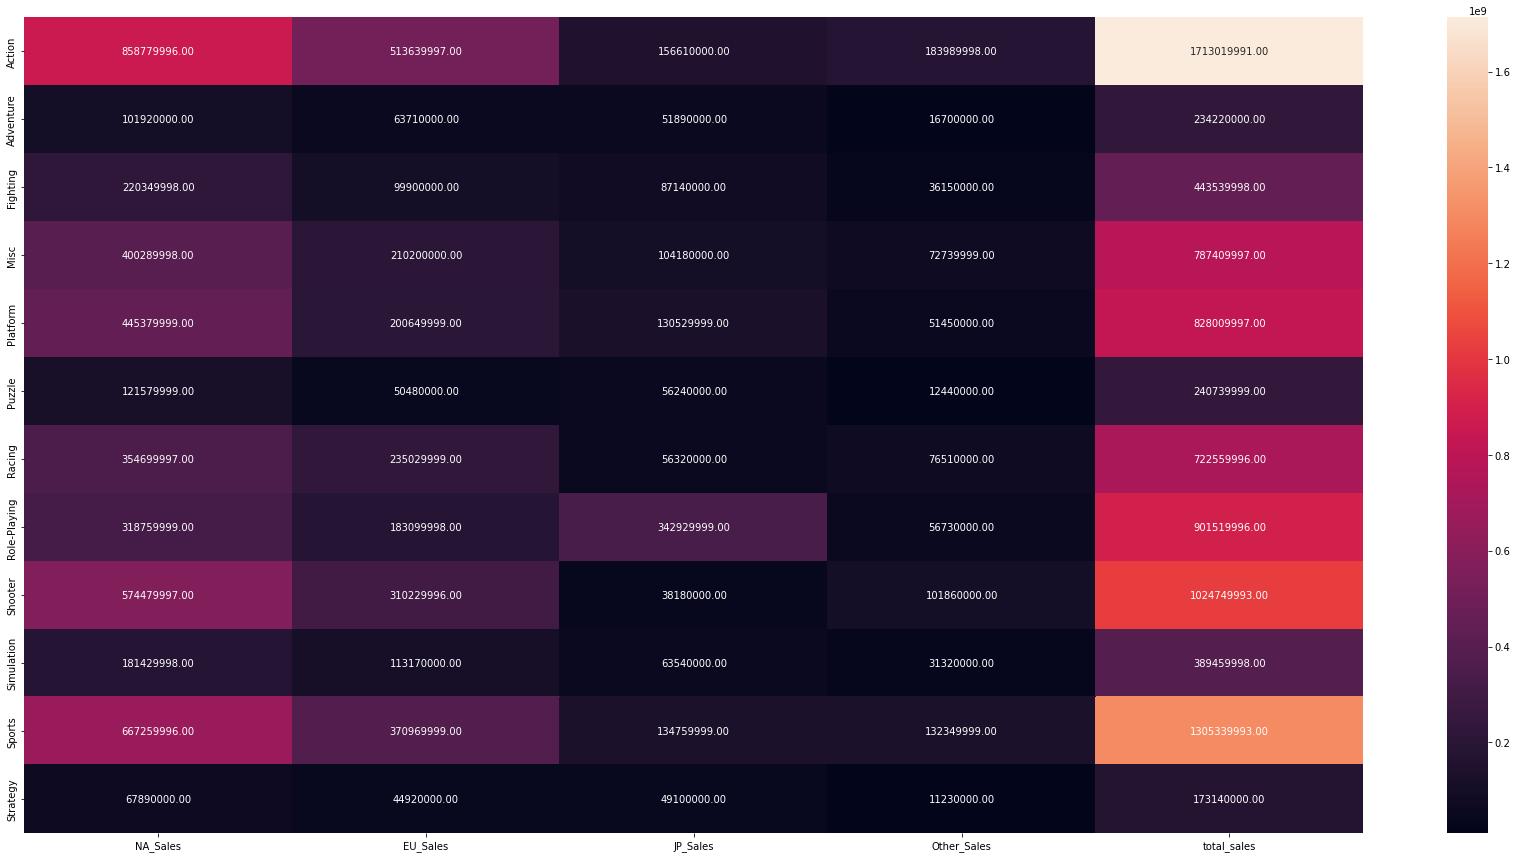

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30, 15))
locate_heatmap = sns.heatmap(df_genre_locate, annot=True, fmt='.2f')
plt.show()

In [99]:
df_genre_of_na_sales = df_clean.groupby('Genre', as_index=False)['NA_Sales'].sum()

In [100]:
df_genre_of_na_sales = pd.DataFrame(df_genre_of_na_sales)

In [101]:
df_genre_of_na_sales

,Genre,NA_Sales
0,Action,858779996
1,Adventure,101920000
2,Fighting,220349998
3,Misc,400289998
4,Platform,445379999
5,Puzzle,121579999
6,Racing,354699997
7,Role-Playing,318759999
8,Shooter,574479997
9,Simulation,181429998


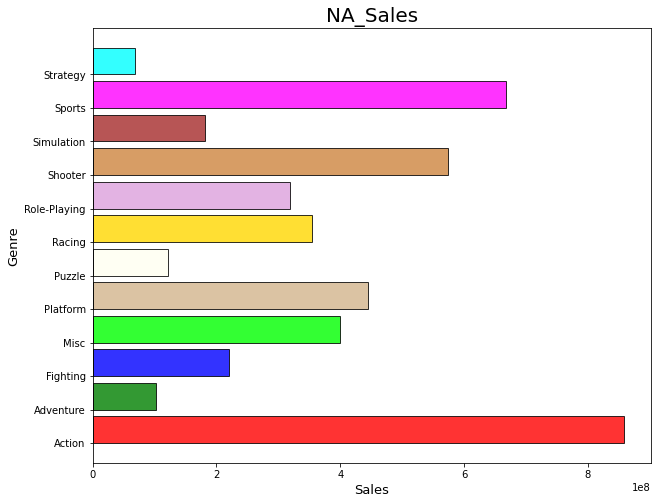

In [102]:
y = df_genre_of_na_sales.Genre
values = df_genre_of_na_sales.NA_Sales

plt.figure(figsize=(10,8))
plt.barh(y, values, color=['r', 'g', 'b', 'lime', 'tan', 'ivory', 'gold', 'plum', 'peru', 'brown', 'magenta', 'aqua'], alpha=0.8,
         align='edge', edgecolor='k')

plt.title('NA_Sales', fontsize=20)
plt.xlabel('Sales', fontsize=13)
plt.ylabel('Genre', fontsize=13)

plt.yticks(y, label='Genre')
plt.show()

In [103]:
df_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,Treasures of the Deep,PS,1997,Action,Namco Bandai Games,100000,70000,0,10000,180000
1,Mini-Yonku Shining Scorpion: Let's & Go!!,SNES,1996,Racing,ASCII Entertainment,0,0,900000,0,900000
2,Casper,PS,1996,Adventure,Interplay,460000,310000,0,50000,820000
3,Glover,N64,1998,Platform,Hasbro Interactive,720000,170000,0,10000,900000
4,Adventure Island,NES,1986,Platform,Hudson Soft,0,0,1050000,0,1050000
...,...,...,...,...,...,...,...,...,...,...
16272,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,40000,0,10000,200000
16273,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000,0,0,0,10000
16274,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000,790000
16275,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000,50000,250000,30000,380000


In [104]:
df_genre_of_eu_sales = df_clean.groupby('Genre', as_index=False)['EU_Sales'].sum()

In [105]:
df_genre_of_eu_sales = pd.DataFrame(df_genre_of_eu_sales)

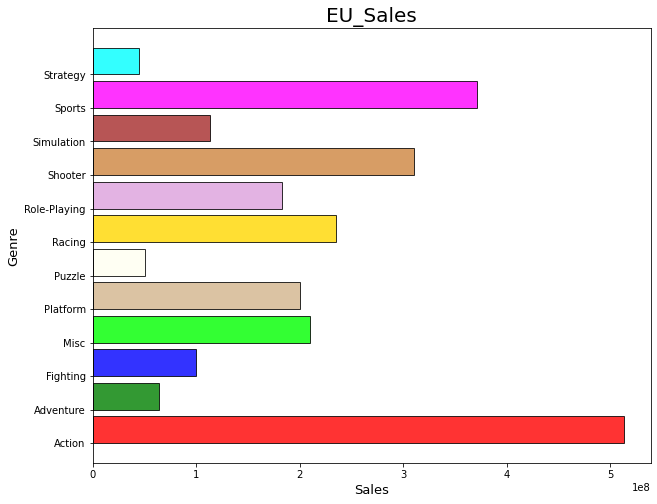

In [106]:
y = df_genre_of_eu_sales.Genre
values = df_genre_of_eu_sales.EU_Sales

plt.figure(figsize=(10,8))
plt.barh(y, values, color=['r', 'g', 'b', 'lime', 'tan', 'ivory', 'gold', 'plum', 'peru', 'brown', 'magenta', 'aqua'], alpha=0.8,
         align='edge', edgecolor='k')

plt.title('EU_Sales', fontsize=20)
plt.xlabel('Sales', fontsize=13)
plt.ylabel('Genre', fontsize=13)

plt.yticks(y, label='Genre')
plt.show()

In [107]:
df_genre_of_jp_sales = df_clean.groupby('Genre', as_index=False)['JP_Sales'].sum()

In [108]:
df_genre_of_jp_sales = pd.DataFrame(df_genre_of_jp_sales)

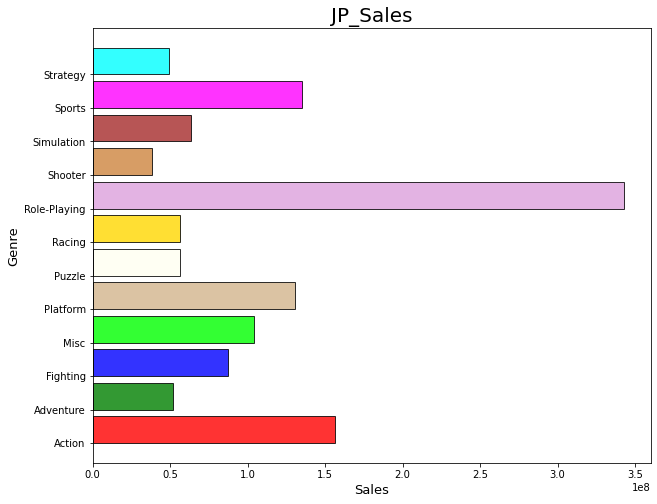

In [109]:
y = df_genre_of_jp_sales.Genre
values = df_genre_of_jp_sales.JP_Sales

plt.figure(figsize=(10,8))
plt.barh(y, values, color=['r', 'g', 'b', 'lime', 'tan', 'ivory', 'gold', 'plum', 'peru', 'brown', 'magenta', 'aqua'], alpha=0.8,
         align='edge', edgecolor='k')

plt.title('JP_Sales', fontsize=20)
plt.xlabel('Sales', fontsize=13)
plt.ylabel('Genre', fontsize=13)

plt.yticks(y, label='Genre')
plt.show()

In [110]:
df_genre_of_other_sales = df_clean.groupby('Genre', as_index=False)['Other_Sales'].sum()

In [111]:
df_genre_of_other_sales = pd.DataFrame(df_genre_of_other_sales)

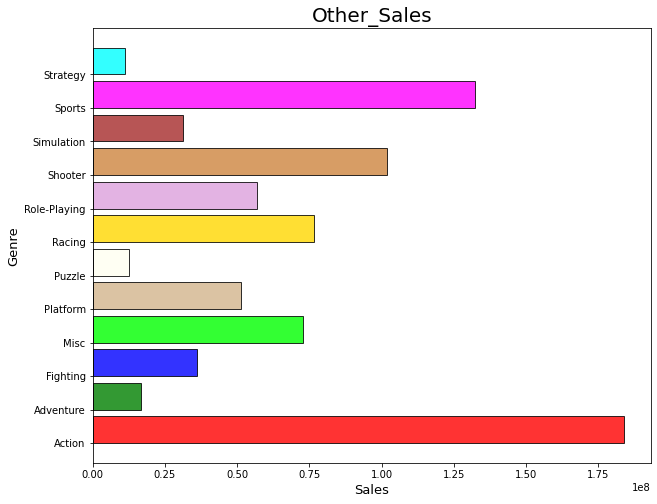

In [112]:
y = df_genre_of_other_sales.Genre
values = df_genre_of_other_sales.Other_Sales

plt.figure(figsize=(10,8))
plt.barh(y, values, color=['r', 'g', 'b', 'lime', 'tan', 'ivory', 'gold', 'plum', 'peru', 'brown', 'magenta', 'aqua'], alpha=0.8,
         align='edge', edgecolor='k')

plt.title('Other_Sales', fontsize=20)
plt.xlabel('Sales', fontsize=13)
plt.ylabel('Genre', fontsize=13)

plt.yticks(y, label='Genre')
plt.show()

## Q2. 연도별 게임의 트렌드가 있을까?

NA_Sales : 북미
EU_Sales : 유럽
JP_Sales : 일본
Other_Sales : 그 외 국가

In [113]:
year_sales_NA = df_clean.groupby('Year')['NA_Sales'].sum()
year_sales_EU = df_clean.groupby('Year')['EU_Sales'].sum()
year_sales_JP = df_clean.groupby('Year')['JP_Sales'].sum()
year_sales_Other = df_clean.groupby('Year')['Other_Sales'].sum()

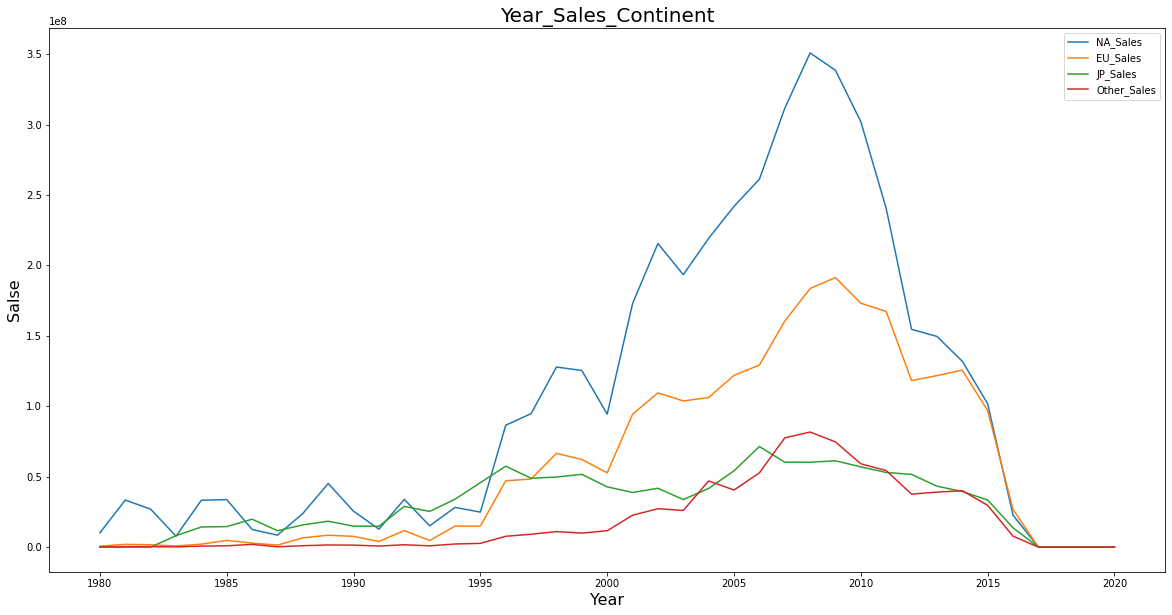

In [114]:
plt.figure(figsize=(20,10))
plt.plot(year_sales_NA.index, year_sales_NA)
plt.plot(year_sales_EU.index, year_sales_EU)
plt.plot(year_sales_JP.index, year_sales_JP)
plt.plot(year_sales_Other.index, year_sales_Other)

plt.title('Year_Sales_Continent', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Salse', fontsize=16)
plt.legend(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
plt.show()

In [115]:
genre_Action = df_clean[df_clean.Genre == 'Action']
genre_Action_year = genre_Action.groupby('Year')['total_sales'].sum()

genre_Sports = df_clean[df_clean.Genre == 'Sports']
genre_Sports_year = genre_Sports.groupby('Year')['total_sales'].sum()

genre_Misc = df_clean[df_clean.Genre == 'Misc']
genre_Misc_year = genre_Misc.groupby('Year')['total_sales'].sum()

genre_Role_Playing = df_clean[df_clean.Genre == 'Role-Playing']
genre_Role_Playing_year = genre_Role_Playing.groupby('Year')['total_sales'].sum()

In [116]:
df_clean.query("Year == 1980")

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
5681,Asteroids,2600,1980,Shooter,Atari,4000000,260000,0,50000,4310000
5894,Kaboom!,2600,1980,Misc,Activision,1070000,70000,0,10000,1150000
7239,Checkers,2600,1980,Misc,Atari,220000,10000,0,0,230000
9104,Bridge,2600,1980,Misc,Activision,250000,20000,0,0,270000
9979,Defender,2600,1980,Misc,Atari,990000,50000,0,10000,1050000
12904,Freeway,2600,1980,Action,Activision,320000,20000,0,0,340000
14005,Boxing,2600,1980,Fighting,Activision,720000,40000,0,10000,770000
14738,Missile Command,2600,1980,Shooter,Atari,2560000,170000,0,30000,2760000


In [117]:
df_clean.Year.value_counts()

2009    1428
2008    1423
2010    1255
2007    1196
2011    1136
2006    1005
2005     939
2002     826
2003     774
2004     759
2012     654
2015     611
2014     582
2013     545
2001     480
1998     377
2000     348
2016     344
1999     336
1997     289
1996     262
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       8
2017       3
2020       1
Name: Year, dtype: int64

In [118]:
df_clean.Genre

0           Action
1           Racing
2        Adventure
3         Platform
4         Platform
           ...    
16272     Platform
16273       Action
16274       Sports
16275       Action
16276     Fighting
Name: Genre, Length: 16277, dtype: object

In [119]:
genre_Action = df_clean[df_clean.Genre == 'Action']
genre_Action_year = genre_Action.groupby('Year')['total_sales'].sum()

genre_Sports = df_clean[df_clean.Genre == 'Sports']
genre_Sports_year = genre_Sports.groupby('Year')['total_sales'].sum()

genre_Misc = df_clean[df_clean.Genre == 'Misc']
genre_Misc_year = genre_Misc.groupby('Year')['total_sales'].sum()

genre_Role_Playing = df_clean[df_clean.Genre == 'Role-Playing']
genre_Role_Playing_year = genre_Role_Playing.groupby('Year')['total_sales'].sum()

genre_Shooter = df_clean[df_clean.Genre == 'Shooter']
genre_Shooter_year = genre_Shooter.groupby('Year')['total_sales'].sum()

genre_Adventure = df_clean[df_clean.Genre == 'Adventure']
genre_Adventure_year = genre_Adventure.groupby('Year')['total_sales'].sum()

genre_Racing = df_clean[df_clean.Genre == 'Racing']
genre_Racing_year = genre_Racing.groupby('Year')['total_sales'].sum()

genre_Platform = df_clean[df_clean.Genre == 'Platform']
genre_Platform_year = genre_Platform.groupby('Year')['total_sales'].sum()

genre_Simulation = df_clean[df_clean.Genre == 'Simulation']
genre_Simulation_year = genre_Simulation.groupby('Year')['total_sales'].sum()

genre_Fighting = df_clean[df_clean.Genre == 'Fighting']
genre_Fighting_year = genre_Fighting.groupby('Year')['total_sales'].sum()

genre_Strategy = df_clean[df_clean.Genre == 'Strategy']
genre_Strategy_year = genre_Strategy.groupby('Year')['total_sales'].sum()

genre_Puzzle = df_clean[df_clean.Genre == 'Puzzle']
genre_Puzzle_year = genre_Puzzle.groupby('Year')['total_sales'].sum()

In [120]:
genre_Action = df_clean[df_clean.Genre == 'Action']
genre_Action_year = genre_Action.groupby('Year')['total_sales'].sum()

In [121]:
genre_Sports = df_clean[df_clean.Genre == 'Sports']
genre_Sports_year = genre_Sports.groupby('Year')['total_sales'].sum()

In [122]:
genre_Misc = df_clean[df_clean.Genre == 'Misc']
genre_Misc_year = genre_Misc.groupby('Year')['total_sales'].sum()

In [123]:
genre_Role_Playing = df_clean[df_clean.Genre == 'Role-Playing']
genre_Role_Playing_year = genre_Role_Playing.groupby('Year')['total_sales'].sum()

In [124]:
genre_Shooter = df_clean[df_clean.Genre == 'Shooter']
genre_Shooter_year = genre_Shooter.groupby('Year')['total_sales'].sum()

In [125]:
genre_Adventure = df_clean[df_clean.Genre == 'Adventure']
genre_Adventure_year = genre_Adventure.groupby('Year')['total_sales'].sum()

In [126]:
genre_Racing = df_clean[df_clean.Genre == 'Racing']
genre_Racing_year = genre_Racing.groupby('Year')['total_sales'].sum()

In [127]:
genre_Platform = df_clean[df_clean.Genre == 'Platform']
genre_Platform_year = genre_Platform.groupby('Year')['total_sales'].sum()

In [128]:
genre_Simulation = df_clean[df_clean.Genre == 'Simulation']
genre_Simulation_year = genre_Simulation.groupby('Year')['total_sales'].sum()

In [129]:
genre_Fighting = df_clean[df_clean.Genre == 'Fighting']
genre_Fighting_year = genre_Fighting.groupby('Year')['total_sales'].sum()

In [130]:
genre_Strategy = df_clean[df_clean.Genre == 'Strategy']
genre_Strategy_year = genre_Strategy.groupby('Year')['total_sales'].sum()

In [131]:
genre_Puzzle = df_clean[df_clean.Genre == 'Puzzle']
genre_Puzzle_year = genre_Puzzle.groupby('Year')['total_sales'].sum()

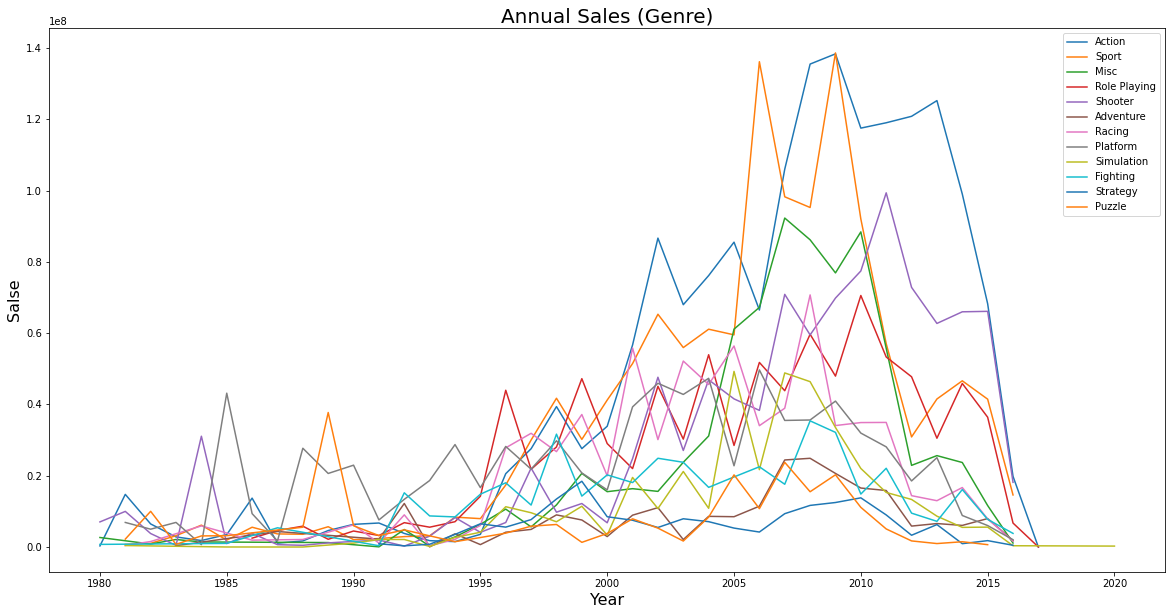

In [132]:
plt.figure(figsize=(20,10))
plt.plot(genre_Action_year.index, genre_Action_year)
plt.plot(genre_Sports_year.index, genre_Sports_year)
plt.plot(genre_Misc_year.index, genre_Misc_year)
plt.plot(genre_Role_Playing_year.index, genre_Role_Playing_year)
plt.plot(genre_Shooter_year.index, genre_Shooter_year)
plt.plot(genre_Adventure_year.index, genre_Adventure_year)
plt.plot(genre_Racing_year.index, genre_Racing_year)
plt.plot(genre_Platform_year.index, genre_Platform_year)
plt.plot(genre_Simulation_year.index, genre_Simulation_year)
plt.plot(genre_Fighting_year.index, genre_Fighting_year)
plt.plot(genre_Strategy_year.index, genre_Strategy_year)
plt.plot(genre_Puzzle_year.index, genre_Puzzle_year)

plt.title('Annual Sales (Genre)', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Salse', fontsize=16)
plt.legend(['Action', 'Sport', 'Misc', 'Role Playing', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle'])
plt.show()


In [133]:
df_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,Treasures of the Deep,PS,1997,Action,Namco Bandai Games,100000,70000,0,10000,180000
1,Mini-Yonku Shining Scorpion: Let's & Go!!,SNES,1996,Racing,ASCII Entertainment,0,0,900000,0,900000
2,Casper,PS,1996,Adventure,Interplay,460000,310000,0,50000,820000
3,Glover,N64,1998,Platform,Hasbro Interactive,720000,170000,0,10000,900000
4,Adventure Island,NES,1986,Platform,Hudson Soft,0,0,1050000,0,1050000
...,...,...,...,...,...,...,...,...,...,...
16272,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,40000,0,10000,200000
16273,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000,0,0,0,10000
16274,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000,790000
16275,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000,50000,250000,30000,380000


In [134]:
df_80_84 = df_clean[(df_clean.Year >= 1980) & (df_clean.Year < 1985)]

In [135]:
df_80_84_a = np.repeat('80_84', len(df_80_84))
df_80_84_a

array(['80_84', '80_84', '80_84', '80_84', '80_84', '80_84', '80_84',
       '80_84', '80_84', '80_84', '80_84', '80_84', '80_84', '80_84',
       '80_84', '80_84', '80_84', '80_84', '80_84', '80_84', '80_84',
       '80_84', '80_84', '80_84', '80_84', '80_84', '80_84', '80_84',
       '80_84', '80_84', '80_84', '80_84', '80_84', '80_84', '80_84',
       '80_84', '80_84', '80_84', '80_84', '80_84', '80_84', '80_84',
       '80_84', '80_84', '80_84', '80_84', '80_84', '80_84', '80_84',
       '80_84', '80_84', '80_84', '80_84', '80_84', '80_84', '80_84',
       '80_84', '80_84', '80_84', '80_84', '80_84', '80_84', '80_84',
       '80_84', '80_84', '80_84', '80_84', '80_84', '80_84', '80_84',
       '80_84', '80_84', '80_84', '80_84', '80_84', '80_84', '80_84',
       '80_84', '80_84', '80_84', '80_84', '80_84', '80_84', '80_84',
       '80_84', '80_84', '80_84', '80_84', '80_84', '80_84', '80_84',
       '80_84', '80_84', '80_84', '80_84', '80_84', '80_84', '80_84',
       '80_84', '80_

In [136]:
df_80_84['Year_5'] = df_80_84_a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [137]:
df_85_89 = df_clean[(df_clean.Year >= 1985) & (df_clean.Year < 1990)]

In [138]:
df_85_89_a = np.repeat('85_89', len(df_85_89))

In [139]:
df_85_89['Year_5'] = df_85_89_a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [140]:
df_90_94 = df_clean[(df_clean.Year >= 1990) & (df_clean.Year < 1995)]

In [141]:
df_90_94_a = np.repeat('90_94', len(df_90_94))

In [142]:
df_90_94['Year_5'] = df_90_94_a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [143]:
df_95_99 = df_clean[(df_clean.Year >= 1995) & (df_clean.Year < 2000)]

In [144]:
df_95_99_a = np.repeat('95_99', len(df_95_99))

In [145]:
df_95_99['Year_5'] = df_95_99_a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [146]:
df_00_04 = df_clean[(df_clean.Year >= 2000) & (df_clean.Year < 2005)]

In [147]:
df_00_04_a = np.repeat('00_04', len(df_00_04))

In [148]:
df_00_04['Year_5'] = df_00_04_a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [149]:
df_05_09 = df_clean[(df_clean.Year >= 2005) & (df_clean.Year < 2010)]

In [150]:
df_05_09_a = np.repeat('05_09', len(df_05_09))

In [151]:
df_05_09['Year_5'] = df_05_09_a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [152]:
df_10_20 = df_clean[(df_clean.Year >= 2010) & (df_clean.Year <= 2020)]

In [153]:
df_10_20_a = np.repeat('10_20', len(df_10_20))

In [154]:
df_10_20['Year_5'] = df_10_20_a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [155]:
df_year_5 = pd.concat([df_80_84, df_85_89, df_90_94, df_95_99, df_00_04, df_05_09, df_10_20])

In [156]:
df_year_5_80_99 = pd.concat([df_80_84, df_85_89, df_90_94, df_95_99])

In [157]:
df_year_5_95_20 = pd.concat([df_95_99, df_00_04, df_05_09, df_10_20])

In [158]:
df_year_5

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales,Year_5
136,Beamrider,2600,1984,Racing,Activision,260000,10000,0,0,270000,80_84
305,Mountain King,2600,1982,Action,CBS Electronics,290000,20000,0,0,310000,80_84
555,Baseball,NES,1983,Sports,Nintendo,730000,100000,2350000,20000,3200000,80_84
572,Mappy,NES,1984,Platform,Namco Bandai Games,0,0,690000,0,690000,80_84
752,Smurf: Rescue In Gargamel's Castle,2600,1981,Action,Coleco,550000,30000,0,10000,590000,80_84
...,...,...,...,...,...,...,...,...,...,...,...
16261,LEGO The Hobbit,XOne,2014,Action,Warner Bros. Interactive Entertainment,130000,120000,0,20000,270000,10_20
16267,MindJack,PS3,2011,Shooter,Square Enix,70000,80000,0,30000,180000,10_20
16269,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010,Adventure,Aqua Plus,0,0,50000,0,50000,10_20
16274,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000,790000,10_20


In [159]:
genre_Action = df_year_5[df_year_5.Genre == 'Action']
genre_Action_year = genre_Action.groupby('Year_5')['total_sales'].sum()

genre_Sports = df_year_5[df_year_5.Genre == 'Sports']
genre_Sports_year = genre_Sports.groupby('Year_5')['total_sales'].sum()

genre_Misc = df_year_5[df_year_5.Genre == 'Misc']
genre_Misc_year = genre_Misc.groupby('Year_5')['total_sales'].sum()

genre_Role_Playing = df_year_5[df_year_5.Genre == 'Role-Playing']
genre_Role_Playing_year = genre_Role_Playing.groupby('Year_5')['total_sales'].sum()

genre_Shooter = df_year_5[df_year_5.Genre == 'Shooter']
genre_Shooter_year = genre_Shooter.groupby('Year_5')['total_sales'].sum()

genre_Adventure = df_year_5[df_year_5.Genre == 'Adventure']
genre_Adventure_year = genre_Adventure.groupby('Year_5')['total_sales'].sum()

genre_Racing = df_year_5[df_year_5.Genre == 'Racing']
genre_Racing_year = genre_Racing.groupby('Year_5')['total_sales'].sum()

genre_Platform = df_year_5[df_year_5.Genre == 'Platform']
genre_Platform_year = genre_Platform.groupby('Year_5')['total_sales'].sum()

genre_Simulation = df_year_5[df_year_5.Genre == 'Simulation']
genre_Simulation_year = genre_Simulation.groupby('Year_5')['total_sales'].sum()

genre_Fighting = df_year_5[df_year_5.Genre == 'Fighting']
genre_Fighting_year = genre_Fighting.groupby('Year_5')['total_sales'].sum()

genre_Strategy = df_year_5[df_year_5.Genre == 'Strategy']
genre_Strategy_year = genre_Strategy.groupby('Year_5')['total_sales'].sum()

genre_Puzzle = df_year_5[df_year_5.Genre == 'Puzzle']
genre_Puzzle_year = genre_Puzzle.groupby('Year_5')['total_sales'].sum()

In [160]:
genre_Action_year = genre_Action_year.reindex(['80_84', '85_89', '90_94', '95_99', '00_04', '05_09', '10_20'])
genre_Sports_year = genre_Sports_year.reindex(['80_84', '85_89', '90_94', '95_99', '00_04', '05_09', '10_20'])
genre_Misc_year = genre_Misc_year.reindex(['80_84', '85_89', '90_94', '95_99', '00_04', '05_09', '10_20'])
genre_Role_Playing_year = genre_Role_Playing_year.reindex(['80_84', '85_89', '90_94', '95_99', '00_04', '05_09', '10_20'])
genre_Shooter_year = genre_Shooter_year.reindex(['80_84', '85_89', '90_94', '95_99', '00_04', '05_09', '10_20'])
genre_Adventure_year = genre_Adventure_year.reindex(['80_84', '85_89', '90_94', '95_99', '00_04', '05_09', '10_20'])
genre_Racing_year = genre_Racing_year.reindex(['80_84', '85_89', '90_94', '95_99', '00_04', '05_09', '10_20'])
genre_Platform_year = genre_Platform_year.reindex(['80_84', '85_89', '90_94', '95_99', '00_04', '05_09', '10_20'])
genre_Simulation_year = genre_Simulation_year.reindex(['80_84', '85_89', '90_94', '95_99', '00_04', '05_09', '10_20'])
genre_Fighting_year = genre_Fighting_year.reindex(['80_84', '85_89', '90_94', '95_99', '00_04', '05_09', '10_20'])
genre_Strategy_year = genre_Strategy_year.reindex(['80_84', '85_89', '90_94', '95_99', '00_04', '05_09', '10_20'])
genre_Puzzle_year = genre_Puzzle_year.reindex(['80_84', '85_89', '90_94', '95_99', '00_04', '05_09', '10_20'])

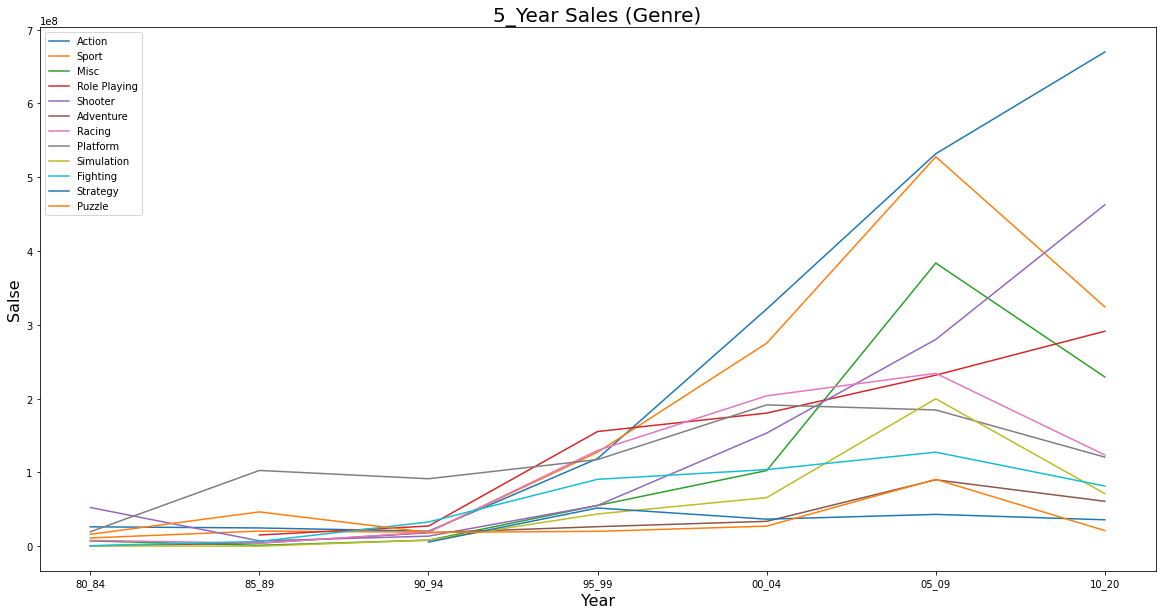

In [161]:
plt.figure(figsize=(20,10))
plt.plot(genre_Action_year.index, genre_Action_year)
plt.plot(genre_Sports_year.index, genre_Sports_year)
plt.plot(genre_Misc_year.index, genre_Misc_year)
plt.plot(genre_Role_Playing_year.index, genre_Role_Playing_year)
plt.plot(genre_Shooter_year.index, genre_Shooter_year)
plt.plot(genre_Adventure_year.index, genre_Adventure_year)
plt.plot(genre_Racing_year.index, genre_Racing_year)
plt.plot(genre_Platform_year.index, genre_Platform_year)
plt.plot(genre_Simulation_year.index, genre_Simulation_year)
plt.plot(genre_Fighting_year.index, genre_Fighting_year)
plt.plot(genre_Strategy_year.index, genre_Strategy_year)
plt.plot(genre_Puzzle_year.index, genre_Puzzle_year)

plt.title('5_Year Sales (Genre)', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Salse', fontsize=16)
plt.legend(['Action', 'Sport', 'Misc', 'Role Playing', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle'])
plt.show()

In [162]:
genre_Action = df_year_5_80_99[df_year_5_80_99.Genre == 'Action']
genre_Action_year = genre_Action.groupby('Year_5')['total_sales'].sum()

genre_Sports = df_year_5_80_99[df_year_5_80_99.Genre == 'Sports']
genre_Sports_year = genre_Sports.groupby('Year_5')['total_sales'].sum()

genre_Misc = df_year_5_80_99[df_year_5_80_99.Genre == 'Misc']
genre_Misc_year = genre_Misc.groupby('Year_5')['total_sales'].sum()

genre_Role_Playing = df_year_5_80_99[df_year_5_80_99.Genre == 'Role-Playing']
genre_Role_Playing_year = genre_Role_Playing.groupby('Year_5')['total_sales'].sum()

genre_Shooter = df_year_5_80_99[df_year_5_80_99.Genre == 'Shooter']
genre_Shooter_year = genre_Shooter.groupby('Year_5')['total_sales'].sum()

genre_Adventure = df_year_5_80_99[df_year_5_80_99.Genre == 'Adventure']
genre_Adventure_year = genre_Adventure.groupby('Year_5')['total_sales'].sum()

genre_Racing = df_year_5_80_99[df_year_5_80_99.Genre == 'Racing']
genre_Racing_year = genre_Racing.groupby('Year_5')['total_sales'].sum()

genre_Platform = df_year_5_80_99[df_year_5_80_99.Genre == 'Platform']
genre_Platform_year = genre_Platform.groupby('Year_5')['total_sales'].sum()

genre_Simulation = df_year_5_80_99[df_year_5_80_99.Genre == 'Simulation']
genre_Simulation_year = genre_Simulation.groupby('Year_5')['total_sales'].sum()

genre_Fighting = df_year_5_80_99[df_year_5_80_99.Genre == 'Fighting']
genre_Fighting_year = genre_Fighting.groupby('Year_5')['total_sales'].sum()

genre_Strategy = df_year_5_80_99[df_year_5_80_99.Genre == 'Strategy']
genre_Strategy_year = genre_Strategy.groupby('Year_5')['total_sales'].sum()

genre_Puzzle = df_year_5_80_99[df_year_5_80_99.Genre == 'Puzzle']
genre_Puzzle_year = genre_Puzzle.groupby('Year_5')['total_sales'].sum()

In [163]:
genre_Action_year = genre_Action_year.reindex(['80_84', '85_89', '90_94', '95_99'])
genre_Sports_year = genre_Sports_year.reindex(['80_84', '85_89', '90_94', '95_99'])
genre_Misc_year = genre_Misc_year.reindex(['80_84', '85_89', '90_94', '95_99'])
genre_Role_Playing_year = genre_Role_Playing_year.reindex(['80_84', '85_89', '90_94', '95_99'])
genre_Shooter_year = genre_Shooter_year.reindex(['80_84', '85_89', '90_94', '95_99'])
genre_Adventure_year = genre_Adventure_year.reindex(['80_84', '85_89', '90_94', '95_99'])
genre_Racing_year = genre_Racing_year.reindex(['80_84', '85_89', '90_94', '95_99'])
genre_Platform_year = genre_Platform_year.reindex(['80_84', '85_89', '90_94', '95_99'])
genre_Simulation_year = genre_Simulation_year.reindex(['80_84', '85_89', '90_94', '95_99'])
genre_Fighting_year = genre_Fighting_year.reindex(['80_84', '85_89', '90_94', '95_99'])
genre_Strategy_year = genre_Strategy_year.reindex(['80_84', '85_89', '90_94', '95_99'])
genre_Puzzle_year = genre_Puzzle_year.reindex(['80_84', '85_89', '90_94', '95_99'])

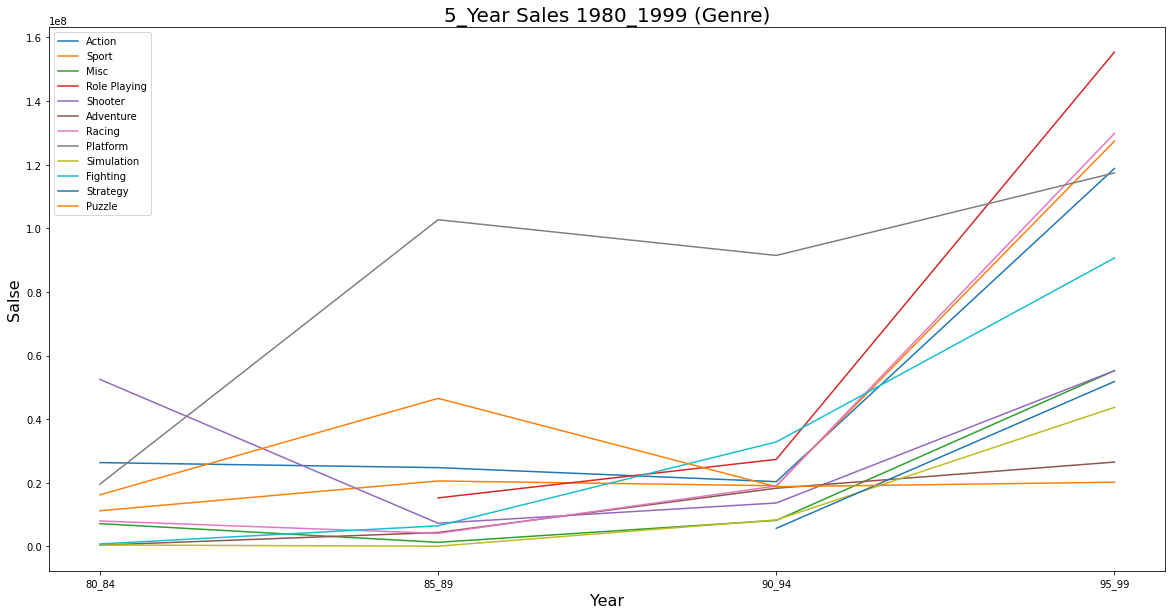

In [164]:
plt.figure(figsize=(20,10))
plt.plot(genre_Action_year.index, genre_Action_year)
plt.plot(genre_Sports_year.index, genre_Sports_year)
plt.plot(genre_Misc_year.index, genre_Misc_year)
plt.plot(genre_Role_Playing_year.index, genre_Role_Playing_year)
plt.plot(genre_Shooter_year.index, genre_Shooter_year)
plt.plot(genre_Adventure_year.index, genre_Adventure_year)
plt.plot(genre_Racing_year.index, genre_Racing_year)
plt.plot(genre_Platform_year.index, genre_Platform_year)
plt.plot(genre_Simulation_year.index, genre_Simulation_year)
plt.plot(genre_Fighting_year.index, genre_Fighting_year)
plt.plot(genre_Strategy_year.index, genre_Strategy_year)
plt.plot(genre_Puzzle_year.index, genre_Puzzle_year)

plt.title('5_Year Sales 1980_1999 (Genre)', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Salse', fontsize=16)
plt.legend(['Action', 'Sport', 'Misc', 'Role Playing', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle'])
plt.show()

In [165]:
genre_Action = df_year_5_95_20[df_year_5_95_20.Genre == 'Action']
genre_Action_year = genre_Action.groupby('Year_5')['total_sales'].sum()

genre_Sports = df_year_5_95_20[df_year_5_95_20.Genre == 'Sports']
genre_Sports_year = genre_Sports.groupby('Year_5')['total_sales'].sum()

genre_Misc = df_year_5_95_20[df_year_5_95_20.Genre == 'Misc']
genre_Misc_year = genre_Misc.groupby('Year_5')['total_sales'].sum()

genre_Role_Playing = df_year_5_95_20[df_year_5_95_20.Genre == 'Role-Playing']
genre_Role_Playing_year = genre_Role_Playing.groupby('Year_5')['total_sales'].sum()

genre_Shooter = df_year_5_95_20[df_year_5_95_20.Genre == 'Shooter']
genre_Shooter_year = genre_Shooter.groupby('Year_5')['total_sales'].sum()

genre_Adventure = df_year_5_95_20[df_year_5_95_20.Genre == 'Adventure']
genre_Adventure_year = genre_Adventure.groupby('Year_5')['total_sales'].sum()

genre_Racing = df_year_5_95_20[df_year_5_95_20.Genre == 'Racing']
genre_Racing_year = genre_Racing.groupby('Year_5')['total_sales'].sum()

genre_Platform = df_year_5_95_20[df_year_5_95_20.Genre == 'Platform']
genre_Platform_year = genre_Platform.groupby('Year_5')['total_sales'].sum()

genre_Simulation = df_year_5_95_20[df_year_5_95_20.Genre == 'Simulation']
genre_Simulation_year = genre_Simulation.groupby('Year_5')['total_sales'].sum()

genre_Fighting = df_year_5_95_20[df_year_5_95_20.Genre == 'Fighting']
genre_Fighting_year = genre_Fighting.groupby('Year_5')['total_sales'].sum()

genre_Strategy = df_year_5_95_20[df_year_5_95_20.Genre == 'Strategy']
genre_Strategy_year = genre_Strategy.groupby('Year_5')['total_sales'].sum()

genre_Puzzle = df_year_5_95_20[df_year_5_95_20.Genre == 'Puzzle']
genre_Puzzle_year = genre_Puzzle.groupby('Year_5')['total_sales'].sum()

In [166]:
genre_Action_year = genre_Action_year.reindex(['95_99', '00_04', '05_09', '10_20'])
genre_Sports_year = genre_Sports_year.reindex(['95_99', '00_04', '05_09', '10_20'])
genre_Misc_year = genre_Misc_year.reindex(['95_99', '00_04', '05_09', '10_20'])
genre_Role_Playing_year = genre_Role_Playing_year.reindex(['95_99', '00_04', '05_09', '10_20'])
genre_Shooter_year = genre_Shooter_year.reindex(['95_99', '00_04', '05_09', '10_20'])
genre_Adventure_year = genre_Adventure_year.reindex(['95_99', '00_04', '05_09', '10_20'])
genre_Racing_year = genre_Racing_year.reindex(['95_99', '00_04', '05_09', '10_20'])
genre_Platform_year = genre_Platform_year.reindex(['95_99', '00_04', '05_09', '10_20'])
genre_Simulation_year = genre_Simulation_year.reindex(['95_99', '00_04', '05_09', '10_20'])
genre_Fighting_year = genre_Fighting_year.reindex(['95_99', '00_04', '05_09', '10_20'])
genre_Strategy_year = genre_Strategy_year.reindex(['95_99', '00_04', '05_09', '10_20'])
genre_Puzzle_year = genre_Puzzle_year.reindex(['95_99', '00_04', '05_09', '10_20'])

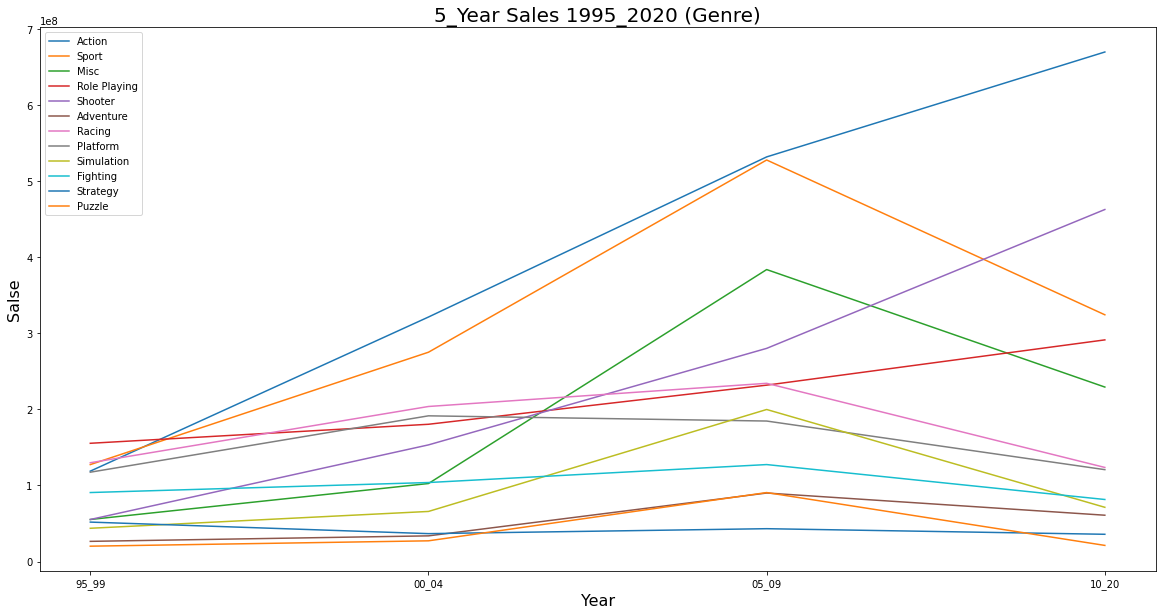

In [167]:
plt.figure(figsize=(20,10))
plt.plot(genre_Action_year.index, genre_Action_year)
plt.plot(genre_Sports_year.index, genre_Sports_year)
plt.plot(genre_Misc_year.index, genre_Misc_year)
plt.plot(genre_Role_Playing_year.index, genre_Role_Playing_year)
plt.plot(genre_Shooter_year.index, genre_Shooter_year)
plt.plot(genre_Adventure_year.index, genre_Adventure_year)
plt.plot(genre_Racing_year.index, genre_Racing_year)
plt.plot(genre_Platform_year.index, genre_Platform_year)
plt.plot(genre_Simulation_year.index, genre_Simulation_year)
plt.plot(genre_Fighting_year.index, genre_Fighting_year)
plt.plot(genre_Strategy_year.index, genre_Strategy_year)
plt.plot(genre_Puzzle_year.index, genre_Puzzle_year)

plt.title('5_Year Sales 1995_2020 (Genre)', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Salse', fontsize=16)
plt.legend(['Action', 'Sport', 'Misc', 'Role Playing', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle'])
plt.show()

In [168]:
df_platform = df_clean.groupby(['Platform'])['total_sales'].sum().reset_index()
platform = df_platform['Platform'].values

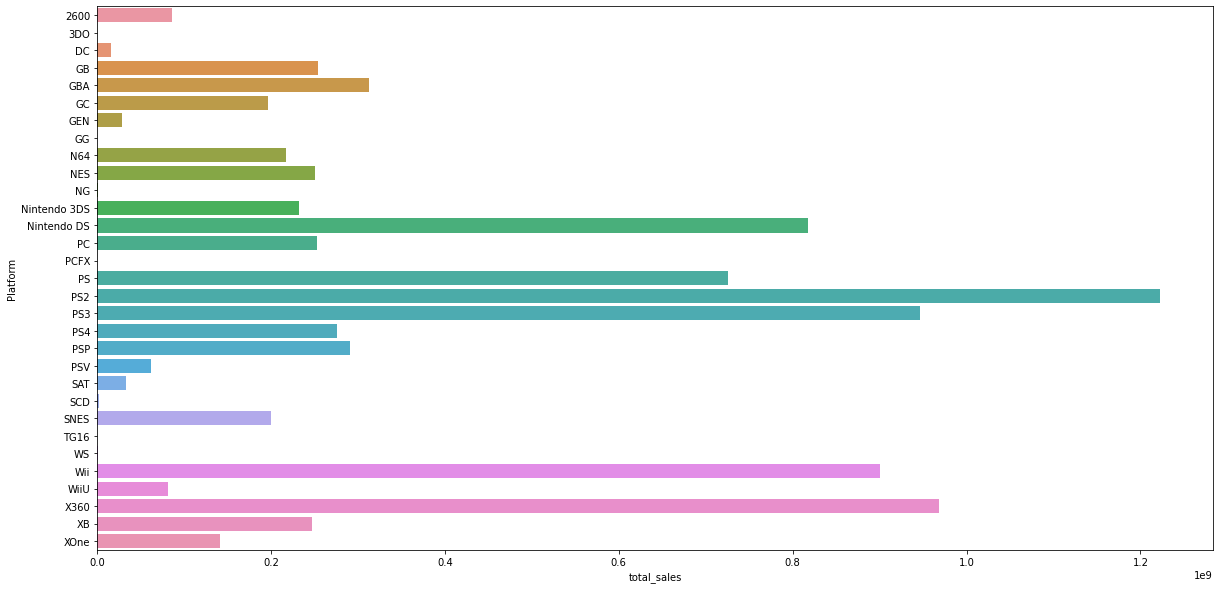

In [169]:
plt.figure(figsize=(20,10))
sns.barplot(x='total_sales', y='Platform', data=df_platform)


plt.show()

In [170]:
df_platform = df_platform.sort_values(by='total_sales', ascending=False).reset_index(drop=True)

In [171]:
df_platform = df_platform.iloc[:15]

In [172]:
df_platform['Platform'].value_counts()

PS2             1
X360            1
PS3             1
Wii             1
Nintendo DS     1
PS              1
GBA             1
PSP             1
PS4             1
GB              1
PC              1
NES             1
XB              1
Nintendo 3DS    1
N64             1
Name: Platform, dtype: int64

In [173]:
df_platform_year = df_clean.groupby(['Platform', 'Year']).sum().reset_index()
platform_year = df_platform_year['Platform'].values

In [174]:
df_platform

,Platform,total_sales
0,PS2,1222439992
1,X360,968599997
2,PS3,946739996
3,Wii,900149998
4,Nintendo DS,817239999
5,PS,725159994
6,GBA,312649999
7,PSP,290840000
8,PS4,275779998
9,GB,254429999


In [175]:
df_ps2 = df_clean[df_clean.Platform == 'PS2']
df_ps2_year = df_ps2.groupby('Year')['total_sales'].sum()

df_x360 = df_clean[df_clean.Platform == 'X360']
df_x360_year = df_x360.groupby('Year')['total_sales'].sum()

df_ps3 = df_clean[df_clean.Platform == 'PS3']
df_ps3_year = df_ps3.groupby('Year')['total_sales'].sum()

df_wii = df_clean[df_clean.Platform == 'Wii']
df_wii_year = df_wii.groupby('Year')['total_sales'].sum()

df_ds = df_clean[df_clean.Platform == 'Nintendo DS']
df_ds_year = df_ds.groupby('Year')['total_sales'].sum()

df_ps = df_clean[df_clean.Platform == 'PS']
df_ps_year = df_ps.groupby('Year')['total_sales'].sum()

df_gba = df_clean[df_clean.Platform == 'GBA']
df_gba_year = df_gba.groupby('Year')['total_sales'].sum()

df_psp = df_clean[df_clean.Platform == 'PSP']
df_psp_year = df_psp.groupby('Year')['total_sales'].sum()

df_ps4 = df_clean[df_clean.Platform == 'PS4']
df_ps4_year = df_ps4.groupby('Year')['total_sales'].sum()

df_gb = df_clean[df_clean.Platform == 'GB']
df_gb_year = df_gb.groupby('Year')['total_sales'].sum()

df_pc = df_clean[df_clean.Platform == 'PC']
df_pc_year = df_pc.groupby('Year')['total_sales'].sum()

df_nes = df_clean[df_clean.Platform == 'NES']
df_nes_year = df_nes.groupby('Year')['total_sales'].sum()

df_xb = df_clean[df_clean.Platform == 'XB']
df_xb_year = df_xb.groupby('Year')['total_sales'].sum()

df_3ds = df_clean[df_clean.Platform == 'Nintendo 3DS']
df_3ds_year = df_3ds.groupby('Year')['total_sales'].sum()

df_n64 = df_clean[df_clean.Platform == 'N64']
df_n64_year = df_n64.groupby('Year')['total_sales'].sum()

df_xone = df_clean[df_clean.Platform == 'XOne']
df_xone_year = df_xone.groupby('Year')['total_sales'].sum()

In [176]:
df_n64_year

Year
1996    34100000
1997    39499999
1998    48079999
1999    57870000
2000    33880000
2001     3250000
2002       80000
Name: total_sales, dtype: int64

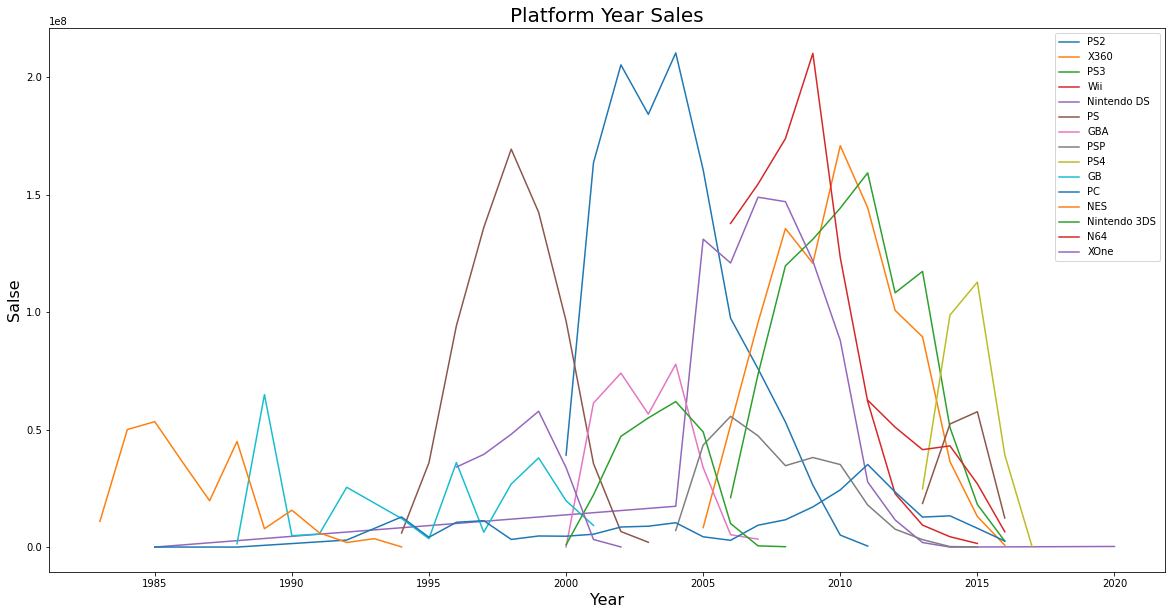

In [177]:
plt.figure(figsize=(20,10))
plt.plot(df_ps2_year.index, df_ps2_year)
plt.plot(df_x360_year.index, df_x360_year)
plt.plot(df_ps3_year.index, df_ps3_year)
plt.plot(df_wii_year.index, df_wii_year)
plt.plot(df_ds_year.index, df_ds_year)
plt.plot(df_ps_year.index, df_ps_year)
plt.plot(df_gba_year.index, df_gba_year)
plt.plot(df_psp_year.index, df_psp_year)
plt.plot(df_ps4_year.index, df_ps4_year)
plt.plot(df_gb_year.index, df_gb_year)
plt.plot(df_pc_year.index, df_pc_year)
plt.plot(df_nes_year.index, df_nes_year)
plt.plot(df_xb_year.index, df_xb_year)
plt.plot(df_3ds_year.index, df_3ds_year)
plt.plot(df_n64_year.index, df_n64_year)
plt.plot(df_xone_year.index, df_xone_year)

plt.title('Platform Year Sales', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Salse', fontsize=16)
plt.legend(['PS2', 'X360', 'PS3', 'Wii', 'Nintendo DS', 'PS', 'GBA', 'PSP', 'PS4', 'GB', 'PC', 'NES', 'Nintendo 3DS', 'N64', 'XOne'])
plt.show()

In [178]:
df_2011_upper = df_clean[(df_clean.Year >= 2011) & (df_clean.Year <= 2016)]
df_2011_upper

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
15,NASCAR Unleashed,PS3,2011,Racing,Activision,90000,0,0,10000,100000
16,Kung Fu Panda: Showdown of Legendary Legends,PS3,2015,Action,Little Orbit,0,20000,0,0,20000
28,Toaru Kagaku no Chou Denjihou,PSP,2011,Adventure,Kadokawa Shoten,0,0,60000,0,60000
33,Uncharted 4: A Thief's End,PS4,2016,Shooter,Sony Computer Entertainment,1300000,2069999,180000,650000,4199999
36,NBA 2K15,PS4,2014,Sports,Take-Two Interactive,1460000,540000,10000,370000,2380000
...,...,...,...,...,...,...,...,...,...,...
16260,Captain Morgane and the Golden Turtle,Nintendo DS,2012,Adventure,Reef Entertainment,0,30000,0,0,30000
16261,LEGO The Hobbit,XOne,2014,Action,Warner Bros. Interactive Entertainment,130000,120000,0,20000,270000
16267,MindJack,PS3,2011,Shooter,Square Enix,70000,80000,0,30000,180000
16274,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000,790000


In [179]:
df_2011_upper.Platform.value_counts()

PS3             703
X360            499
Nintendo 3DS    499
PSV             409
PC              371
PS4             334
PSP             311
XOne            212
Wii             197
Nintendo DS     187
WiiU            143
PS2               7
Name: Platform, dtype: int64

In [180]:
df_platform_year_2011 = df_2011_upper.groupby(['Platform', 'Year']).sum().reset_index()
platform_year_2011 = df_platform_year_2011['Platform'].values
platform_year_2011

array(['Nintendo 3DS', 'Nintendo 3DS', 'Nintendo 3DS', 'Nintendo 3DS',
       'Nintendo 3DS', 'Nintendo 3DS', 'Nintendo DS', 'Nintendo DS',
       'Nintendo DS', 'Nintendo DS', 'PC', 'PC', 'PC', 'PC', 'PC', 'PC',
       'PS2', 'PS3', 'PS3', 'PS3', 'PS3', 'PS3', 'PS3', 'PS4', 'PS4',
       'PS4', 'PS4', 'PSP', 'PSP', 'PSP', 'PSP', 'PSP', 'PSV', 'PSV',
       'PSV', 'PSV', 'PSV', 'PSV', 'Wii', 'Wii', 'Wii', 'Wii', 'Wii',
       'WiiU', 'WiiU', 'WiiU', 'WiiU', 'WiiU', 'X360', 'X360', 'X360',
       'X360', 'X360', 'X360', 'XOne', 'XOne', 'XOne', 'XOne'],
      dtype=object)

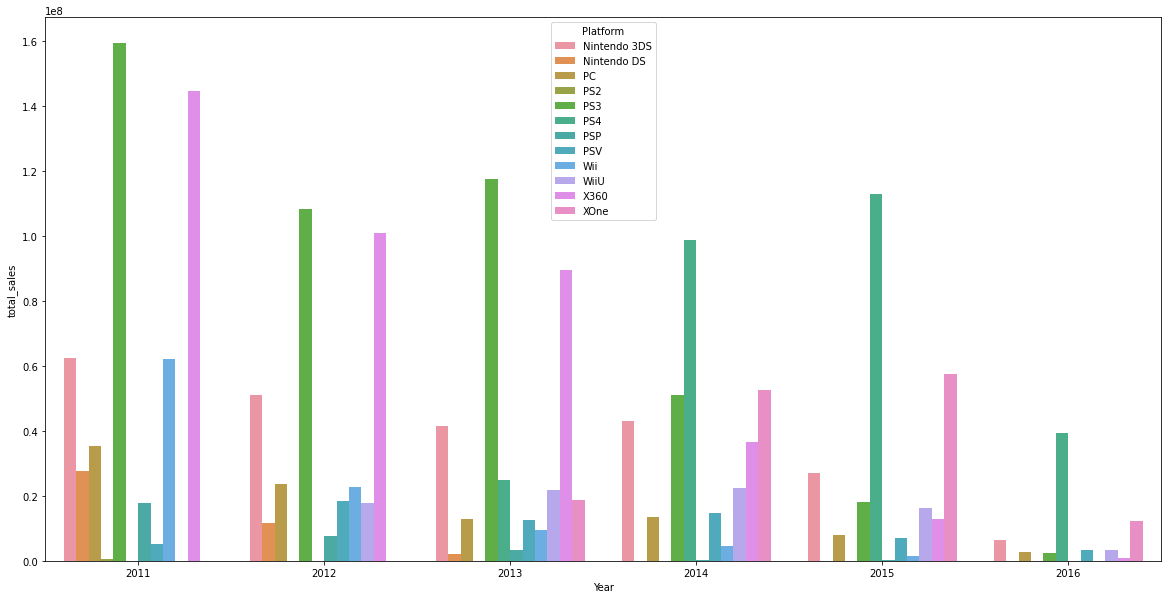

In [181]:
plt.figure(figsize=(20,10))
sns.barplot(x='Year', y='total_sales', data=df_platform_year_2011, hue='Platform')


plt.show()

콘솔 게임 : Wii PS PS2 PS3 PS4 XB X360 XOne GC N64 SNES NES 2600 DC GEN 3D TG16 GG PCFX

In [182]:
df_ps3_2011 = df_2011_upper[df_2011_upper.Platform == 'PS3']
df_ps3_2011_year = df_ps3_2011.groupby('Year')['total_sales'].sum()

df_ps4_2011 = df_2011_upper[df_2011_upper.Platform == 'PS4']
df_ps4_2011_year = df_ps4_2011.groupby('Year')['total_sales'].sum()

df_x360_2011 = df_2011_upper[df_2011_upper.Platform == 'X360']
df_x360_2011_year = df_x360_2011.groupby('Year')['total_sales'].sum()

df_xone_2011 = df_2011_upper[df_2011_upper.Platform == 'XOne']
df_xone_2011_year = df_xone_2011.groupby('Year')['total_sales'].sum()

df_3ds_2011 = df_2011_upper[df_2011_upper.Platform == 'Nintendo 3DS']
df_3ds_2011_year = df_3ds_2011.groupby('Year')['total_sales'].sum()

df_pc_2011 = df_2011_upper[df_2011_upper.Platform == 'PC']
df_pc_2011_year = df_2011_upper.groupby('Year')['total_sales'].sum()

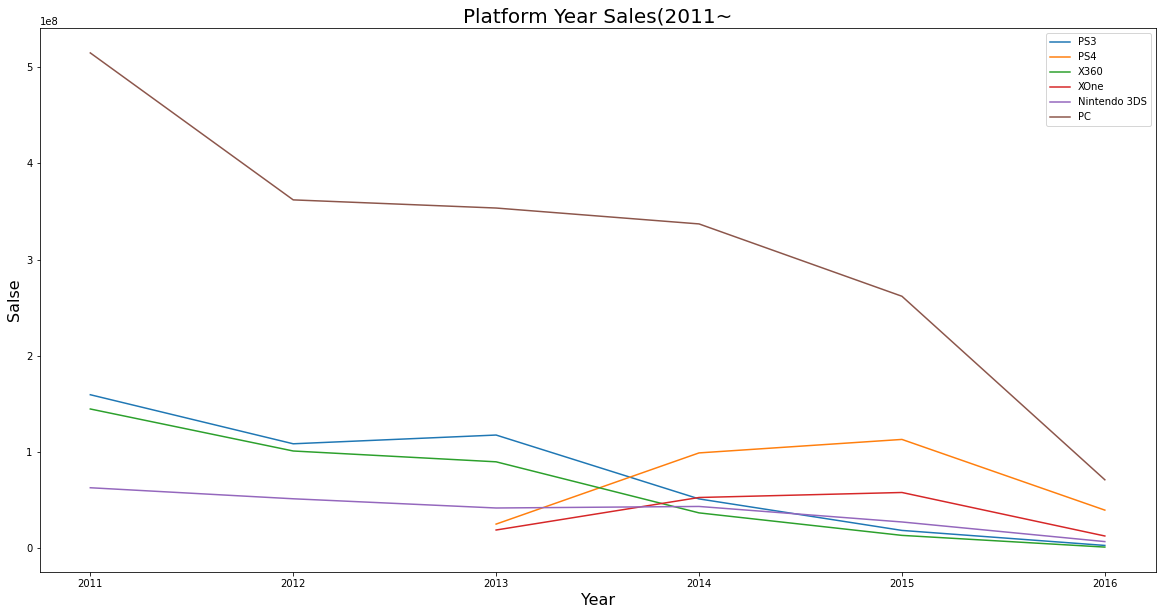

In [183]:
plt.figure(figsize=(20,10))
plt.plot(df_ps3_2011_year.index, df_ps3_2011_year)
plt.plot(df_ps4_2011_year.index, df_ps4_2011_year)
plt.plot(df_x360_2011_year.index, df_x360_2011_year)
plt.plot(df_xone_2011_year.index, df_xone_2011_year)
plt.plot(df_3ds_2011_year.index, df_3ds_2011_year)
plt.plot(df_pc_2011_year.index, df_pc_2011_year)

plt.title('Platform Year Sales(2011~', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Salse', fontsize=16)
plt.legend(['PS3', 'PS4', 'X360', 'XOne', 'Nintendo 3DS', 'PC'])
plt.show()

### 가설 검정

In [184]:
df_cat = df_clean.pivot_table(values='total_sales', index='Year', columns='Genre', aggfunc='sum')
df_cat

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,340000.0,NaN,770000.0,2700000.0,NaN,NaN,NaN,NaN,7070000.0,NaN,NaN,NaN
1981,14790000.0,NaN,NaN,NaN,6920000.0,2250000.0,480000.0,NaN,10020000.0,440000.0,780000.0,NaN
1982,6500000.0,NaN,NaN,870000.0,5030000.0,10040000.0,1570000.0,NaN,3810000.0,NaN,1060000.0,NaN
1983,2860000.0,400000.0,NaN,2140000.0,6930000.0,780000.0,NaN,NaN,490000.0,NaN,3200000.0,NaN
1984,1850000.0,NaN,NaN,1450000.0,690000.0,3140000.0,5950000.0,NaN,31100000.0,NaN,6170000.0,NaN
1985,3520000.0,NaN,1050000.0,NaN,43170000.0,3210000.0,NaN,NaN,1000000.0,40000.0,1960000.0,NaN
1986,13740000.0,NaN,NaN,NaN,9390000.0,NaN,1960000.0,2520000.0,3890000.0,NaN,5579999.0,NaN
1987,1110000.0,4380000.0,5419999.0,NaN,1740000.0,NaN,NaN,4650000.0,690000.0,NaN,3710000.0,NaN
1988,1740000.0,NaN,NaN,NaN,27730000.0,5580000.0,2140000.0,5880000.0,510000.0,30000.0,3600000.0,NaN


In [187]:
df_cat.fillna(0, inplace=True)

In [192]:
df_cat.drop(index=2017.0, inplace=True)

KeyError: ignored

In [251]:
np.var(df_cat)

Genre
Action          2.177229e+15
Adventure       4.675716e+13
Fighting        1.057463e+14
Misc            7.816187e+14
Platform        2.143775e+14
Puzzle          6.107326e+13
Racing          3.890466e+14
Role-Playing    4.595618e+14
Shooter         8.177441e+14
Simulation      1.876203e+14
Sports          1.403347e+15
Strategy        2.400927e+13
dtype: float64

In [193]:
chi2_val, p, dof, expected= chi2_contingency(df_cat, correction=False)
if(p<0.05) : 
    print('p value:', p,"\n"+'귀무가설을 기각합니다. 게임 장르와 연도는 연관이 있다.')
else :
    print('p value:', p,"\n"+'귀무가설을 기각하지 못한다. 게임 장르와 연도는 연관이 없다.')

p value: 0.0 
귀무가설을 기각합니다. 게임 장르와 연도는 연관이 있다.


## Q3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [194]:
df_clean[df_clean['Name'].duplicated()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
59,LEGO Star Wars II: The Original Trilogy,GBA,2006,Action,LucasArts,60000,20000,0,0,80000
212,Jikkyou Powerful Pro Baseball 2016,PS4,2016,Sports,Konami Digital Entertainment,0,0,170000,0,170000
226,Call of Duty 4: Modern Warfare,PC,2007,Shooter,Activision,0,1120000,0,30000,1150000
324,IL-2 Sturmovik: Birds of Prey,Nintendo DS,2009,Simulation,505 Games,60000,0,0,0,60000
344,NASCAR Unleashed,Nintendo 3DS,2011,Racing,Activision,180000,0,0,10000,190000
...,...,...,...,...,...,...,...,...,...,...
16270,Madden NFL 2005,PS2,2004,Sports,Electronic Arts,4179999,260000,10000,80000,4529999
16272,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,40000,0,10000,200000
16274,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000,790000
16275,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000,50000,250000,30000,380000


In [195]:
duplicated_name = df_clean[df_clean.duplicated(subset=['Name'], keep=False)]

In [196]:
df_clean[df_clean.Name == 'Casper']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
2,Casper,PS,1996,Adventure,Interplay,460000,310000,0,50000,820000
524,Casper,GBA,2002,Adventure,Microids,10000,0,0,0,10000


In [197]:
duplicated_name.sort_values(by='Name')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
15966,007: Quantum of Solace,X360,2008,Action,Activision,820000,520000,10000,140000,1490000
6770,007: Quantum of Solace,PS3,2008,Action,Activision,430000,520000,20000,200000,1170000
2697,007: Quantum of Solace,PS2,2008,Action,Activision,170000,0,0,260000,430000
9338,007: Quantum of Solace,Nintendo DS,2008,Action,Activision,110000,10000,0,10000,130000
5466,007: Quantum of Solace,Wii,2008,Action,Activision,300000,290000,10000,70000,670000
...,...,...,...,...,...,...,...,...,...,...
13510,pro evolution soccer 2011,Wii,2010,Sports,Konami Digital Entertainment,80000,100000,30000,20000,230000
5752,pro evolution soccer 2011,PS3,2010,Sports,Konami Digital Entertainment,290000,1180000,540000,410000,2420000
15939,pro evolution soccer 2011,PS2,2010,Sports,Konami Digital Entertainment,40000,210000,50000,110000,410000
14746,uDraw Studio: Instant Artist,Wii,2011,Misc,THQ,80000,90000,0,20000,190000


In [198]:
duplicated_name['Name'].value_counts()

Need for Speed: Most Wanted             12
LEGO Marvel Super Heroes                 9
Ratatouille                              9
FIFA 14                                  9
FIFA 15                                  8
                                        ..
Rat Attack!                              2
Strike Witches: Shirogane no Tsubasa     2
Vietcong: Purple Haze                    2
SimAnimals Africa                        2
Pump It Up: Exceed                       2
Name: Name, Length: 2712, dtype: int64

In [199]:
Need_for_Speed_Most_Wanted = duplicated_name[duplicated_name.Name == 'Need for Speed: Most Wanted']

In [200]:
Need_for_Speed_Most_Wanted.total_sales.sum()

14079999

In [201]:
df_name_total_sales = df_clean.groupby('Name',as_index=False)['total_sales'].sum()

In [202]:
df_name_total_sales = pd.DataFrame(df_name_total_sales)

In [203]:
df_name_total_sales = df_name_total_sales.sort_values(by='total_sales', ascending=False)

In [204]:
df_total_sales_rank_10 = df_name_total_sales.iloc[:10]
df_total_sales_rank_10 = df_total_sales_rank_10.reset_index()
df_total_sales_rank_10 = df_total_sales_rank_10.iloc[:, 1:3]
df_total_sales_rank_10

,Name,total_sales
0,Wii Sports,82740000
1,Grand Theft Auto V,55919998
2,Super Mario Bros.,45310000
3,Tetris,35840000
4,Mario Kart Wii,35830000
5,Wii Sports Resort,33000000
6,Pokemon Red/Pokemon Blue,31380000
7,Call of Duty: Modern Warfare 3,30840000
8,New Super Mario Bros.,30010000
9,Call of Duty: Black Ops II,29730000


In [205]:
abc = np.array(df_total_sales_rank_10.Name)

In [206]:
df_total_sales_rank_10_list = []

for i in range(len(df_total_sales_rank_10)):
  ratio_sample = df_total_sales_rank_10.total_sales.iloc[i] / df_total_sales_rank_10.total_sales.sum()
  df_total_sales_rank_10_list.append(round(ratio_sample, 3))  

df_total_sales_rank_10_list

[0.202, 0.136, 0.11, 0.087, 0.087, 0.08, 0.076, 0.075, 0.073, 0.072]

In [207]:
df_total_sales_rank_10_list = np.array(df_total_sales_rank_10_list)

In [208]:
df_total_sales_rank_10_list = df_total_sales_rank_10_list * 100

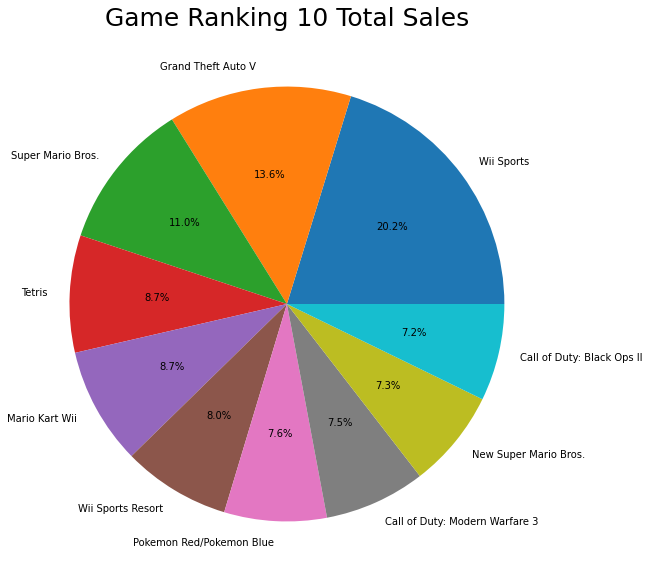

In [209]:
ratio = df_total_sales_rank_10_list
labels = abc

plt.figure(figsize=(15,10))
plt.title('Game Ranking 10 Total Sales', fontsize='25')
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

In [210]:
continent = df_clean.groupby('Name', as_index=False)['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [211]:
continent_na = continent.sort_values(by='NA_Sales', ascending=False)

In [212]:
continent_na = continent_na.iloc[:10]

In [213]:
continent_na = continent_na.loc[:,['Name','NA_Sales']]

In [214]:
continent_na = continent_na.reset_index(drop=True)

In [215]:
continent_na

,Name,NA_Sales
0,Wii Sports,41490000
1,Super Mario Bros.,32480000
2,Duck Hunt,26930000
3,Tetris,26170000
4,Grand Theft Auto V,23460000
5,Call of Duty: Black Ops,17010000
6,Super Mario World,15990000
7,Mario Kart Wii,15850000
8,Wii Sports Resort,15750000
9,Call of Duty: Modern Warfare 3,15580000


In [216]:
bcd = np.array(continent_na.Name)

In [217]:
continent_na_list = []

for i in range(len(continent_na)):
  ratio_sample = continent_na.NA_Sales.iloc[i] / continent_na.NA_Sales.sum()
  continent_na_list.append(round(ratio_sample, 3))  

continent_na_list

[0.18, 0.141, 0.117, 0.113, 0.102, 0.074, 0.069, 0.069, 0.068, 0.068]

In [218]:
continent_na_list = np.array(continent_na_list)

In [219]:
continent_na_list = continent_na_list * 100

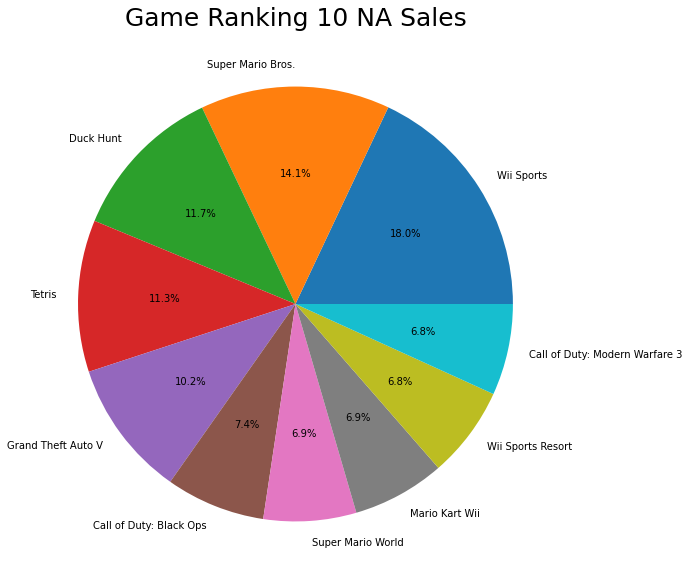

In [220]:
ratio = continent_na_list
labels = bcd

plt.figure(figsize=(15,10))
plt.title('Game Ranking 10 NA Sales', fontsize='25')
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

In [221]:
df.head(1)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
79,Treasures of the Deep,PS,1997,Action,Namco Bandai Games,0.1,0.07,0,0.01


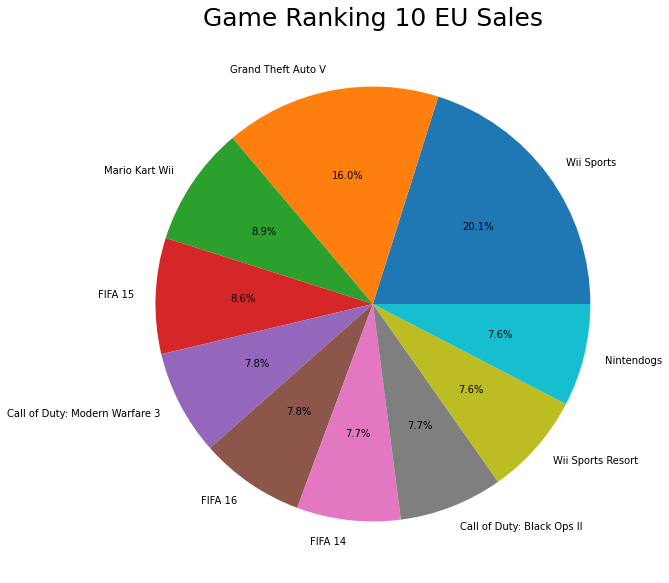

In [222]:
continent_eu = continent.sort_values(by='EU_Sales', ascending=False)
continent_eu = continent_eu.iloc[:10]
continent_eu = continent_eu.loc[:,['Name','EU_Sales']]
continent_eu = continent_eu.reset_index(drop=True)
cde = np.array(continent_eu.Name)

continent_eu_list = []

for i in range(len(continent_eu)):
  ratio_sample = continent_eu.EU_Sales.iloc[i] / continent_eu.EU_Sales.sum()
  continent_eu_list.append(round(ratio_sample, 3))  

continent_eu_list = np.array(continent_eu_list)

continent_eu_list = continent_eu_list * 100

ratio = continent_eu_list
labels = cde

plt.figure(figsize=(15,10))
plt.title('Game Ranking 10 EU Sales', fontsize='25')
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

In [223]:
continent_eu

,Name,EU_Sales
0,Wii Sports,29020000
1,Grand Theft Auto V,23039999
2,Mario Kart Wii,12880000
3,FIFA 15,12400000
4,Call of Duty: Modern Warfare 3,11290000
5,FIFA 16,11290000
6,FIFA 14,11140000
7,Call of Duty: Black Ops II,11050000
8,Wii Sports Resort,11010000
9,Nintendogs,11000000


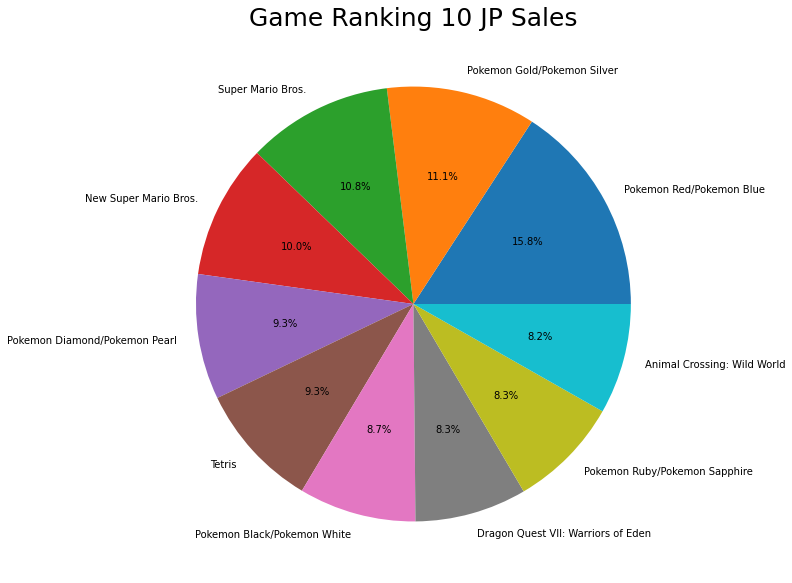

In [224]:
continent_jp = continent.sort_values(by='JP_Sales', ascending=False)
continent_jp = continent_jp.iloc[:10]
continent_jp = continent_jp.loc[:,['Name','JP_Sales']]
continent_jp = continent_jp.reset_index(drop=True)
efg = np.array(continent_jp.Name)

continent_jp_list = []

for i in range(len(continent_jp)):
  ratio_sample = continent_jp.JP_Sales.iloc[i] / continent_jp.JP_Sales.sum()
  continent_jp_list.append(round(ratio_sample, 3))  

continent_jp_list = np.array(continent_jp_list)
continent_jp_list = continent_jp_list * 100

ratio = continent_jp_list
labels = efg

plt.figure(figsize=(15,10))
plt.title('Game Ranking 10 JP Sales', fontsize='25')
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

In [225]:
continent_jp

,Name,JP_Sales
0,Pokemon Red/Pokemon Blue,10220000
1,Pokemon Gold/Pokemon Silver,7200000
2,Super Mario Bros.,6960000
3,New Super Mario Bros.,6500000
4,Pokemon Diamond/Pokemon Pearl,6040000
5,Tetris,6030000
6,Pokemon Black/Pokemon White,5650000
7,Dragon Quest VII: Warriors of Eden,5399999
8,Pokemon Ruby/Pokemon Sapphire,5380000
9,Animal Crossing: Wild World,5330000


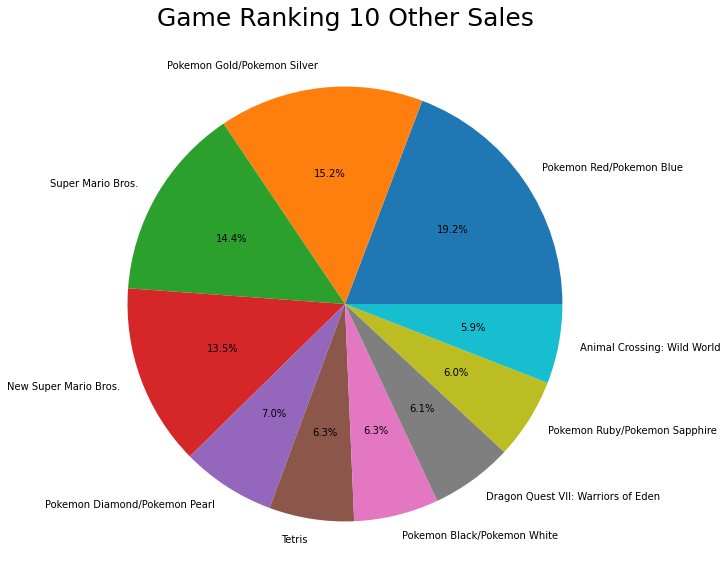

In [226]:
continent_other = continent.sort_values(by='Other_Sales', ascending=False)
continent_other = continent_other.iloc[:10]
continent_other = continent_other.loc[:,['Name','Other_Sales']]
continent_other = continent_other.reset_index(drop=True)
fgh = np.array(continent_other.Name)

continent_other_list = []

for i in range(len(continent_other)):
  ratio_sample = continent_other.Other_Sales.iloc[i] / continent_other.Other_Sales.sum()
  continent_other_list.append(round(ratio_sample, 3))  

continent_other_list = np.array(continent_other_list)
continent_other_list = continent_other_list * 100

ratio = continent_other_list
labels = efg

plt.figure(figsize=(15,10))
plt.title('Game Ranking 10 Other Sales', fontsize='25')
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

In [227]:
continent_other

,Name,Other_Sales
0,Grand Theft Auto: San Andreas,10720000
1,Wii Sports,8460000
2,Grand Theft Auto V,8029999
3,Gran Turismo 4,7530000
4,Call of Duty: Black Ops II,3880000
5,FIFA Soccer 08,3530000
6,Pro Evolution Soccer 2008,3510000
7,Call of Duty: Black Ops 3,3420000
8,Call of Duty: Modern Warfare 3,3350000
9,Mario Kart Wii,3310000


In [228]:
df_name_total_sales

,Name,total_sales
10854,Wii Sports,82740000
3655,Grand Theft Auto V,55919998
9208,Super Mario Bros.,45310000
9590,Tetris,35840000
5497,Mario Kart Wii,35830000
...,...,...
4305,Instant Brain,10000
1720,Curse of the Amsterdam Diamond,10000
9007,Starry ? Sky: After Autumn,10000
7189,Planet Monsters,10000


In [229]:
df_name_sales = df_clean.groupby('Name', as_index=False)['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [230]:
df_name_sales

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,'98 Koshien,150000,100000,120000,30000
1,.hack//G.U. Vol.1//Rebirth,0,0,170000,0
2,.hack//G.U. Vol.2//Reminisce,110000,90000,0,30000
3,.hack//G.U. Vol.2//Reminisce (jp sales),0,0,160000,0
4,.hack//G.U. Vol.3//Redemption,0,0,170000,0
...,...,...,...,...,...
11325,thinkSMART FAMILY!,30000,0,0,0
11326,thinkSMART: Chess for Kids,10000,0,0,0
11327,uDraw Studio,1670000,580000,0,200000
11328,uDraw Studio: Instant Artist,90000,100000,0,20000


In [231]:
df_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,Treasures of the Deep,PS,1997,Action,Namco Bandai Games,100000,70000,0,10000,180000
1,Mini-Yonku Shining Scorpion: Let's & Go!!,SNES,1996,Racing,ASCII Entertainment,0,0,900000,0,900000
2,Casper,PS,1996,Adventure,Interplay,460000,310000,0,50000,820000
3,Glover,N64,1998,Platform,Hasbro Interactive,720000,170000,0,10000,900000
4,Adventure Island,NES,1986,Platform,Hudson Soft,0,0,1050000,0,1050000
...,...,...,...,...,...,...,...,...,...,...
16272,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,40000,0,10000,200000
16273,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000,0,0,0,10000
16274,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000,790000
16275,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000,50000,250000,30000,380000


In [232]:
df_total_sales = df_clean.sort_values(by='total_sales', ascending=False)

In [233]:
df_total_sales = df_total_sales.iloc[:10]
df_total_sales

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
2943,Wii Sports,Wii,2006,Sports,Nintendo,41490000,29020000,3770000,8460000,82740000
4195,Super Mario Bros.,NES,1985,Platform,Nintendo,29080000,3580000,6810000,770000,40240000
12362,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850000,12880000,3790000,3310000,35830000
3373,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750000,11010000,3280000,2960000,33000000
7738,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270000,8890000,10220000,1000000,31380000
1281,Tetris,GB,1989,Puzzle,Nintendo,23200000,2260000,4220000,580000,30260000
6867,New Super Mario Bros.,Nintendo DS,2006,Platform,Nintendo,11380000,9230000,6500000,2900000,30010000
3047,Wii Play,Wii,2006,Misc,Nintendo,14030000,9200000,2930000,2850000,29010000
16212,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14590000,7060000,4700000,2260000,28610000
10332,Duck Hunt,NES,1984,Shooter,Nintendo,26930000,630000,280000,470000,28310000


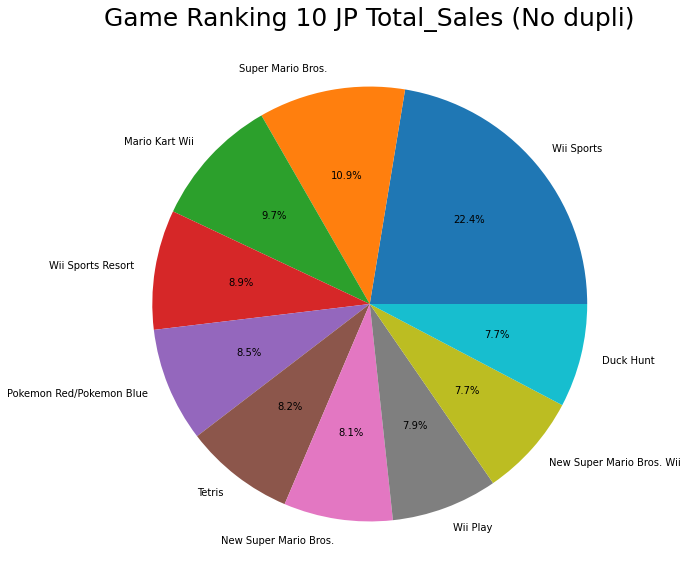

In [234]:
df_total_sales = df_total_sales.reset_index(drop=True)
fgh = np.array(df_total_sales.Name)
df_total_sales_list = []

for i in range(len(df_total_sales)):
  ratio_sample = df_total_sales.total_sales.iloc[i] / df_total_sales.total_sales.sum()
  df_total_sales_list.append(round(ratio_sample, 3))  

df_total_sales_list = np.array(df_total_sales_list)
df_total_sales_list = df_total_sales_list * 100

ratio = df_total_sales_list
labels = fgh

plt.figure(figsize=(15,10))
plt.title('Game Ranking 10 JP Total_Sales (No dupli)', fontsize='25')
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

In [235]:
df_year_genre = df_clean.groupby(['Year', 'Genre']).size().reset_index(name='Count')
year_genre_bool = df_year_genre.groupby(['Year'])['Count'].transform(max) == df_year_genre['Count']
year_max_genre = df_year_genre[year_genre_bool].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=['Year','Count']).reset_index(drop=True)
year_max_genre.rename(index = {'Count': 'Sales'}, inplace = True)
year_max_genre

,Year,Genre,Count
0,1980,Misc,4
1,1981,Action,25
2,1982,Action,18
3,1983,Action,7
4,1984,Puzzle,3
5,1985,Platform,4
6,1986,Action,6
7,1987,Sports,4
8,1988,Platform,4
9,1989,Puzzle,5


In [236]:
df_year_genre

,Year,Genre,Count
0,1980,Action,1
1,1980,Fighting,1
2,1980,Misc,4
3,1980,Shooter,2
4,1981,Action,25
...,...,...,...
383,2016,Sports,38
384,2016,Strategy,10
385,2017,Action,1
386,2017,Role-Playing,2


In [237]:
duplicated_name

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
2,Casper,PS,1996,Adventure,Interplay,460000,310000,0,50000,820000
3,Glover,N64,1998,Platform,Hasbro Interactive,720000,170000,0,10000,900000
6,Mobile Suit Gundam,PS,1995,Action,Namco Bandai Games,0,0,420000,30000,450000
10,S.C.A.R.S,PS,1998,Racing,Ubisoft,50000,30000,0,10000,90000
13,Super Robot Taisen F Kanketsuhen,SAT,1998,Strategy,Banpresto,0,0,550000,0,550000
...,...,...,...,...,...,...,...,...,...,...
16270,Madden NFL 2005,PS2,2004,Sports,Electronic Arts,4179999,260000,10000,80000,4529999
16272,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,40000,0,10000,200000
16274,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000,790000
16275,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000,50000,250000,30000,380000


In [238]:
duplicated_name[duplicated_name.Name == 'Call of Duty: Modern Warfare 3']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
2846,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9030000,4280000,130000,1320000,14760000
4963,Call of Duty: Modern Warfare 3,Wii,2011,Shooter,Activision,600000,210000,0,80000,890000
11003,Call of Duty: Modern Warfare 3,PC,2011,Shooter,Activision,410000,980000,0,330000,1720000
13862,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5540000,5820000,490000,1620000,13470000


In [300]:
duple_name_year = duplicated_name[(duplicated_name.Year >= 2011) & (duplicated_name.Year <=2020)]

In [301]:
df_duple_name_year_total_sales = duple_name_year.groupby('Name',as_index=False)['total_sales'].sum()
df_duple_name_year_total_sales = pd.DataFrame(df_duple_name_year_total_sales)
df_duple_name_year_total_sales = df_duple_name_year_total_sales.sort_values(by='total_sales', ascending=False)

In [302]:
df_duple_name_year_total_sales

,Name,total_sales
287,Grand Theft Auto V,55919998
102,Call of Duty: Modern Warfare 3,30840000
100,Call of Duty: Black Ops II,29730000
101,Call of Duty: Ghosts,27370000
99,Call of Duty: Black Ops 3,25299999
...,...,...
356,Kiniro no Corda 3,10000
116,Chaos;Head Noah,10000
139,Dead Rising,10000
502,Ninja Gaiden Sigma 2,10000


In [299]:
df_duple_name_year_total_sales

,total_sales
0,55919998
1,30840000
2,29730000
3,27370000
4,25299999
5,23750000
6,21890000
7,19279999
8,19020000
9,17370000


In [242]:
df_duple_name_year_total_sales_rank_10 = df_duple_name_year_total_sales.iloc[:10]
df_duple_name_year_total_sales_rank_10 = df_duple_name_year_total_sales_rank_10.reset_index()
df_duple_name_year_total_sales_rank_10 = df_duple_name_year_total_sales_rank_10.iloc[:, 1:3]
df_duple_name_year_total_sales_rank_10

,Name,total_sales
0,Grand Theft Auto V,55919998
1,Call of Duty: Modern Warfare 3,30840000
2,Call of Duty: Black Ops II,29730000
3,Call of Duty: Ghosts,27370000
4,Call of Duty: Black Ops 3,25299999
5,Minecraft,23750000
6,Call of Duty: Advanced Warfare,21890000
7,The Elder Scrolls V: Skyrim,19279999
8,FIFA 15,19020000
9,Battlefield 3,17370000


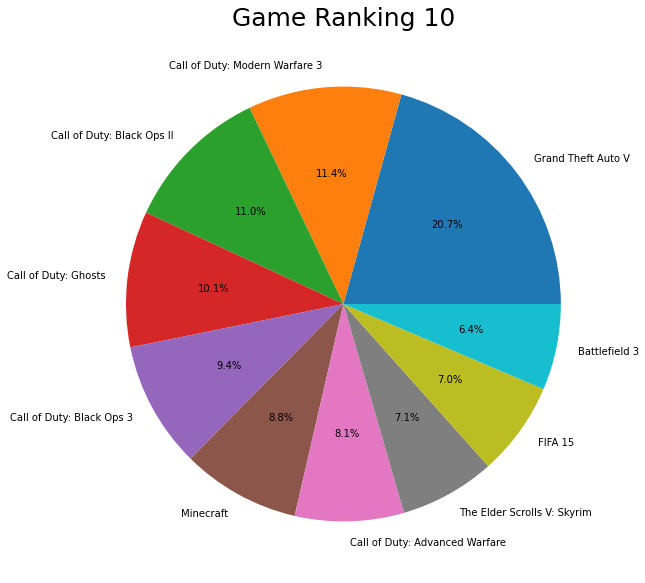

In [243]:
zxc = np.array(df_duple_name_year_total_sales_rank_10.Name)

df_duple_name_year_total_sales_rank_10_list = []

for i in range(len(df_duple_name_year_total_sales_rank_10)):
  ratio_sample = df_duple_name_year_total_sales_rank_10.total_sales.iloc[i] / df_duple_name_year_total_sales_rank_10.total_sales.sum()
  df_duple_name_year_total_sales_rank_10_list.append(round(ratio_sample, 3))  

df_duple_name_year_total_sales_rank_10_list = np.array(df_duple_name_year_total_sales_rank_10_list)

df_duple_name_year_total_sales_rank_10_list = df_duple_name_year_total_sales_rank_10_list * 100

ratio = df_duple_name_year_total_sales_rank_10_list
labels = zxc

plt.figure(figsize=(15,10))
plt.title('Game Ranking 10', fontsize='25')
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

In [244]:
gta5 = duple_name_year[duple_name_year.Name == 'Grand Theft Auto V']
gta5

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
2067,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3800000,5810000,360000,2020000,11990000
3500,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7010000,9270000,970000,4139999,21389999
10668,Grand Theft Auto V,XOne,2014,Action,Take-Two Interactive,2660000,2009999,0,410000,5079999
10744,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9630000,5310000,60000,1380000,16380000
16255,Grand Theft Auto V,PC,2015,Action,Take-Two Interactive,360000,640000,0,80000,1080000


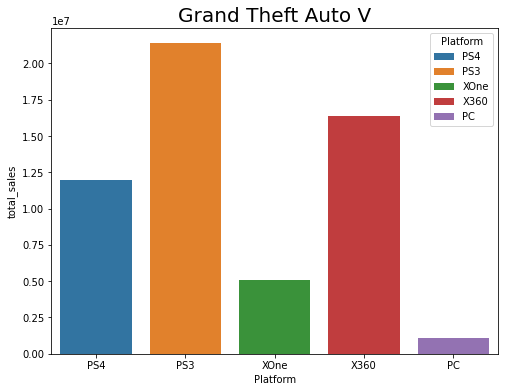

In [245]:
plt.figure(figsize=(8,6))
sns.barplot(x='Platform', y='total_sales', data=gta5, hue='Platform', dodge=False)

plt.title('Grand Theft Auto V', fontsize=20,)
plt.show()

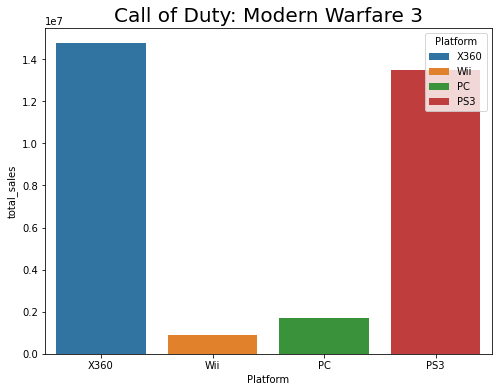

In [246]:
cod = duple_name_year[duple_name_year.Name == 'Call of Duty: Modern Warfare 3']

plt.figure(figsize=(8,6))
sns.barplot(x='Platform', y='total_sales', data=cod, hue='Platform', dodge=False)

plt.title('Call of Duty: Modern Warfare 3', fontsize=20)
plt.show()

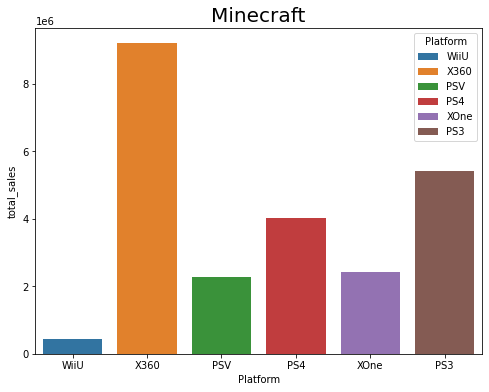

In [247]:
mine = duple_name_year[duple_name_year.Name == 'Minecraft']

plt.figure(figsize=(8,6))
sns.barplot(x='Platform', y='total_sales', data=mine, hue='Platform', dodge=False)

plt.title('Minecraft', fontsize=20)
plt.show()

In [303]:
dfd = df_duple_name_year_total_sales

In [320]:
df_duple_name_year_total_sales = df_duple_name_year_total_sales.sort_values(by='total_sales', ascending=False).reset_index(drop=True)
df_duple_name_year_total_sales

,Name,total_sales
0,Grand Theft Auto V,55919998
1,Call of Duty: Modern Warfare 3,30840000
2,Call of Duty: Black Ops II,29730000
3,Call of Duty: Ghosts,27370000
4,Call of Duty: Black Ops 3,25299999
...,...,...
831,Kiniro no Corda 3,10000
832,Chaos;Head Noah,10000
833,Dead Rising,10000
834,Ninja Gaiden Sigma 2,10000


In [321]:
df_duple_name_year_total_sales = df_duple_name_year_total_sales.iloc[:10]
df_duple_name_year_total_sales

,Name,total_sales
0,Grand Theft Auto V,55919998
1,Call of Duty: Modern Warfare 3,30840000
2,Call of Duty: Black Ops II,29730000
3,Call of Duty: Ghosts,27370000
4,Call of Duty: Black Ops 3,25299999
5,Minecraft,23750000
6,Call of Duty: Advanced Warfare,21890000
7,The Elder Scrolls V: Skyrim,19279999
8,FIFA 15,19020000
9,Battlefield 3,17370000


In [324]:
dfduple_name = df_duple_name_year_total_sales.iloc[:, 0]
dfduple_name

0                Grand Theft Auto V
1    Call of Duty: Modern Warfare 3
2        Call of Duty: Black Ops II
3              Call of Duty: Ghosts
4         Call of Duty: Black Ops 3
5                         Minecraft
6    Call of Duty: Advanced Warfare
7       The Elder Scrolls V: Skyrim
8                           FIFA 15
9                     Battlefield 3
Name: Name, dtype: object

In [263]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [269]:
df_duple_name_year_total_sales = pd.DataFrame(df_duple_name_year_total_sales)

In [270]:
df_duple_name_year_total_sales

,total_sales
0,55919998
1,30840000
2,29730000
3,27370000
4,25299999
5,23750000
6,21890000
7,19279999
8,19020000
9,17370000


In [271]:
log_df_duple_name_year_total_sales = np.log(df_duple_name_year_total_sales)

In [273]:
log_df_duple_name_year_total_sales

,total_sales
0,17.839433
1,17.244323
2,17.207667
3,17.124958
4,17.046315
5,16.983093
6,16.901540
7,16.774579
8,16.761002
9,16.670255


In [274]:
scaler = StandardScaler()
log_df_duple_name_year_total_sales_scaled = scaler.fit_transform(log_df_duple_name_year_total_sales)

In [275]:
log_df_duple_name_year_total_sales_scaled

array([[ 2.45363126],
       [ 0.59143347],
       [ 0.47673095],
       [ 0.21792022],
       [-0.02816748],
       [-0.22599921],
       [-0.48119108],
       [-0.87847552],
       [-0.9209608 ],
       [-1.2049218 ]])

In [283]:
sse = {}

for k in range(1, 10):
  kmeans = KMeans(n_clusters=k, random_state=1)
  kmeans.fit(log_df_duple_name_year_total_sales_scaled)
  sse[k] = kmeans.inertia_

In [284]:
sse

{1: 9.999999999999996,
 2: 3.3107707091413454,
 3: 0.7294594153106846,
 4: 0.2393828285376678,
 5: 0.13242136131277008,
 6: 0.08914903550651389,
 7: 0.027049529693989882,
 8: 0.007480833037021404,
 9: 0.0009024995595297959}

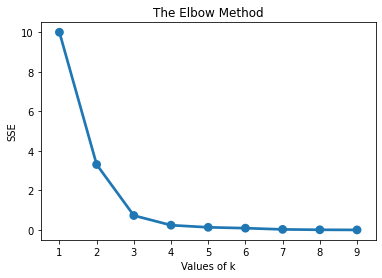

In [288]:
plt.title('The Elbow Method')
plt.xlabel('Values of k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [289]:
log_df_duple_name_year_total_sales

,total_sales
0,17.839433
1,17.244323
2,17.207667
3,17.124958
4,17.046315
5,16.983093
6,16.901540
7,16.774579
8,16.761002
9,16.670255


In [314]:
log_df_duple_name_year_total_sales

,total_sales
0,17.839433
1,17.244323
2,17.207667
3,17.124958
4,17.046315
5,16.983093
6,16.901540
7,16.774579
8,16.761002
9,16.670255


In [290]:
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=42)
kmeans.fit(log_df_duple_name_year_total_sales_scaled)

cluster_labels = kmeans.labels_

log_df_duple_name_year_total_sales_k3 = log_df_duple_name_year_total_sales.assign(Cluster = cluster_labels)


In [291]:
log_df_duple_name_year_total_sales_k3

,total_sales,Cluster
0,17.839433,1
1,17.244323,2
2,17.207667,2
3,17.124958,2
4,17.046315,2
5,16.983093,2
6,16.901540,0
7,16.774579,0
8,16.761002,0
9,16.670255,0


In [327]:
dfduple_name = pd.DataFrame(dfduple_name)

In [332]:
a = pd.concat([log_df_duple_name_year_total_sales_k3, dfduple_name], axis=1)

In [333]:
a

,total_sales,Cluster,Name
0,17.839433,1,Grand Theft Auto V
1,17.244323,2,Call of Duty: Modern Warfare 3
2,17.207667,2,Call of Duty: Black Ops II
3,17.124958,2,Call of Duty: Ghosts
4,17.046315,2,Call of Duty: Black Ops 3
5,16.983093,2,Minecraft
6,16.901540,0,Call of Duty: Advanced Warfare
7,16.774579,0,The Elder Scrolls V: Skyrim
8,16.761002,0,FIFA 15
9,16.670255,0,Battlefield 3


In [292]:
cluster_0 = log_df_duple_name_year_total_sales_k3[log_df_duple_name_year_total_sales_k3.Cluster == 0]
cluster_1 = log_df_duple_name_year_total_sales_k3[log_df_duple_name_year_total_sales_k3.Cluster == 1]
cluster_2 = log_df_duple_name_year_total_sales_k3[log_df_duple_name_year_total_sales_k3.Cluster == 2]

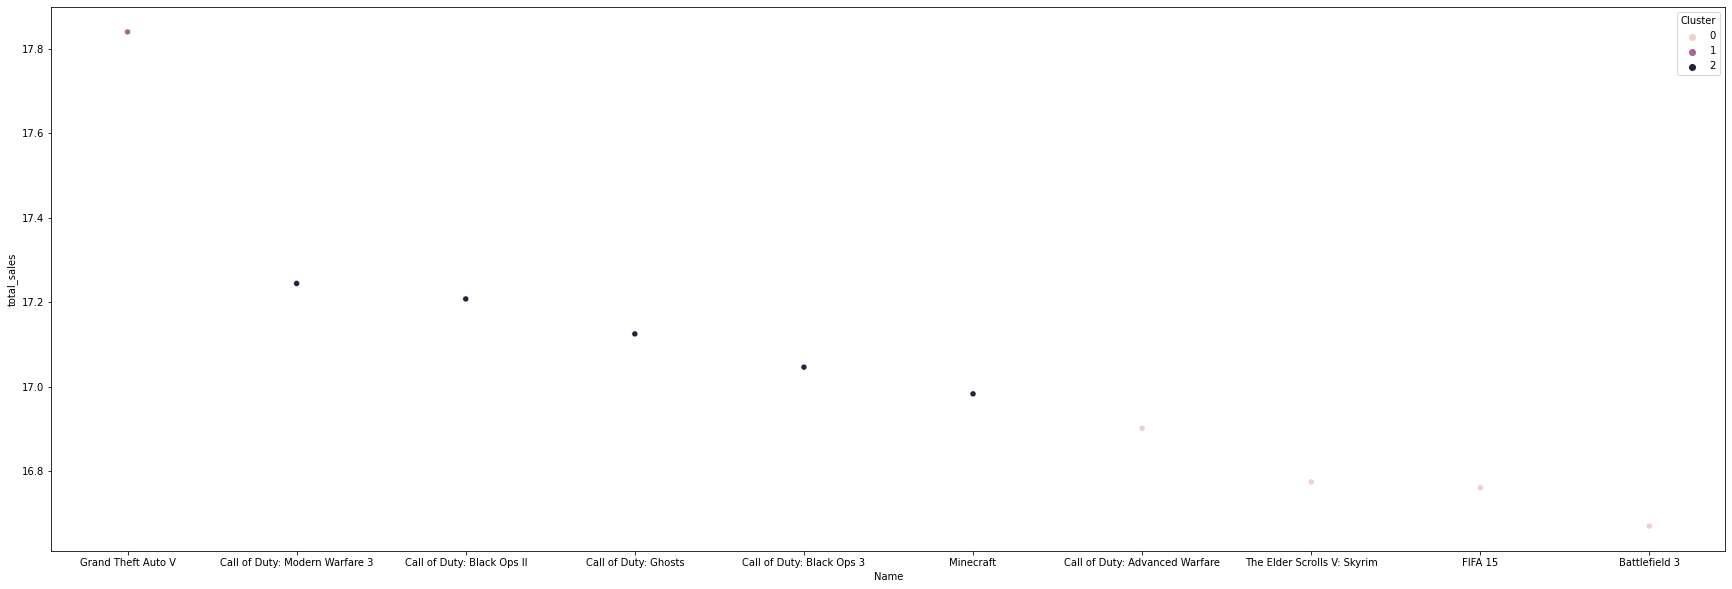

In [335]:
plt.figure(figsize=(30,10))
sns.scatterplot(data=a, x='Name', y='total_sales', hue='Cluster')

In [304]:
dfd = dfd.reset_index(drop=True)

,Name,total_sales
0,Grand Theft Auto V,55919998
1,Call of Duty: Modern Warfare 3,30840000
2,Call of Duty: Black Ops II,29730000
3,Call of Duty: Ghosts,27370000
4,Call of Duty: Black Ops 3,25299999
...,...,...
831,Kiniro no Corda 3,10000
832,Chaos;Head Noah,10000
833,Dead Rising,10000
834,Ninja Gaiden Sigma 2,10000


In [306]:
dfd_name = dfd.iloc[:,0]
dfd_name

0                           Grand Theft Auto V
1               Call of Duty: Modern Warfare 3
2                   Call of Duty: Black Ops II
3                         Call of Duty: Ghosts
4                    Call of Duty: Black Ops 3
                        ...                   
831                          Kiniro no Corda 3
832                            Chaos;Head Noah
833                                Dead Rising
834                       Ninja Gaiden Sigma 2
835    Arabians Lost: The Engagement on Desert
Name: Name, Length: 836, dtype: object

In [307]:
dfd = pd.DataFrame(dfd.iloc[:, 1:])

In [308]:
dfd

,total_sales
0,55919998
1,30840000
2,29730000
3,27370000
4,25299999
...,...
831,10000
832,10000
833,10000
834,10000


In [315]:
dfd_log

,total_sales
0,17.839433
1,17.244323
2,17.207667
3,17.124958
4,17.046315
...,...
831,9.210340
832,9.210340
833,9.210340
834,9.210340


In [309]:
dfd_log = np.log(dfd)

scaler = StandardScaler()
dfd_scaled = scaler.fit_transform(dfd_log)

sse = {}

for k in range(1, 10):
  kmeans = KMeans(n_clusters=k, random_state=1)
  kmeans.fit(dfd_scaled)
  sse[k] = kmeans.inertia_

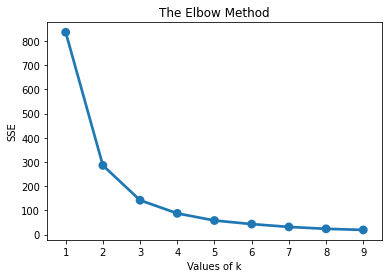

In [310]:
plt.title('The Elbow Method')
plt.xlabel('Values of k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [313]:
dfd_scaled

array([[ 3.01733492],
       [ 2.63611043],
       [ 2.61262882],
       [ 2.55964573],
       [ 2.50926727],
       [ 2.46876765],
       [ 2.41652541],
       [ 2.33519433],
       [ 2.32649685],
       [ 2.26836506],
       [ 2.26057318],
       [ 2.23272511],
       [ 2.22171395],
       [ 2.13202443],
       [ 2.09250381],
       [ 2.08958537],
       [ 2.08763234],
       [ 2.07926485],
       [ 2.06321145],
       [ 2.05554573],
       [ 2.04622405],
       [ 2.01523006],
       [ 1.98610707],
       [ 1.9791941 ],
       [ 1.94712794],
       [ 1.90562245],
       [ 1.88179591],
       [ 1.86124028],
       [ 1.84144097],
       [ 1.82249145],
       [ 1.77250965],
       [ 1.7652712 ],
       [ 1.73716315],
       [ 1.72608138],
       [ 1.7234965 ],
       [ 1.69885526],
       [ 1.69163721],
       [ 1.68341848],
       [ 1.67695243],
       [ 1.6600194 ],
       [ 1.64750549],
       [ 1.6426266 ],
       [ 1.6327559 ],
       [ 1.62474835],
       [ 1.61561857],
       [ 1

In [316]:
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=42)
kmeans.fit(dfd_log)

cluster_labels = kmeans.labels_

dfd_k3 = dfd_log.assign(Cluster = cluster_labels)

In [317]:
dfd_k3

,total_sales,Cluster
0,17.839433,0
1,17.244323,0
2,17.207667,0
3,17.124958,0
4,17.046315,0
...,...,...
831,9.210340,2
832,9.210340,2
833,9.210340,2
834,9.210340,2


In [336]:
b = pd.concat([dfd_name, dfd_k3], axis=1)
b

,Name,total_sales,Cluster
0,Grand Theft Auto V,17.839433,0
1,Call of Duty: Modern Warfare 3,17.244323,0
2,Call of Duty: Black Ops II,17.207667,0
3,Call of Duty: Ghosts,17.124958,0
4,Call of Duty: Black Ops 3,17.046315,0
...,...,...,...
831,Kiniro no Corda 3,9.210340,2
832,Chaos;Head Noah,9.210340,2
833,Dead Rising,9.210340,2
834,Ninja Gaiden Sigma 2,9.210340,2


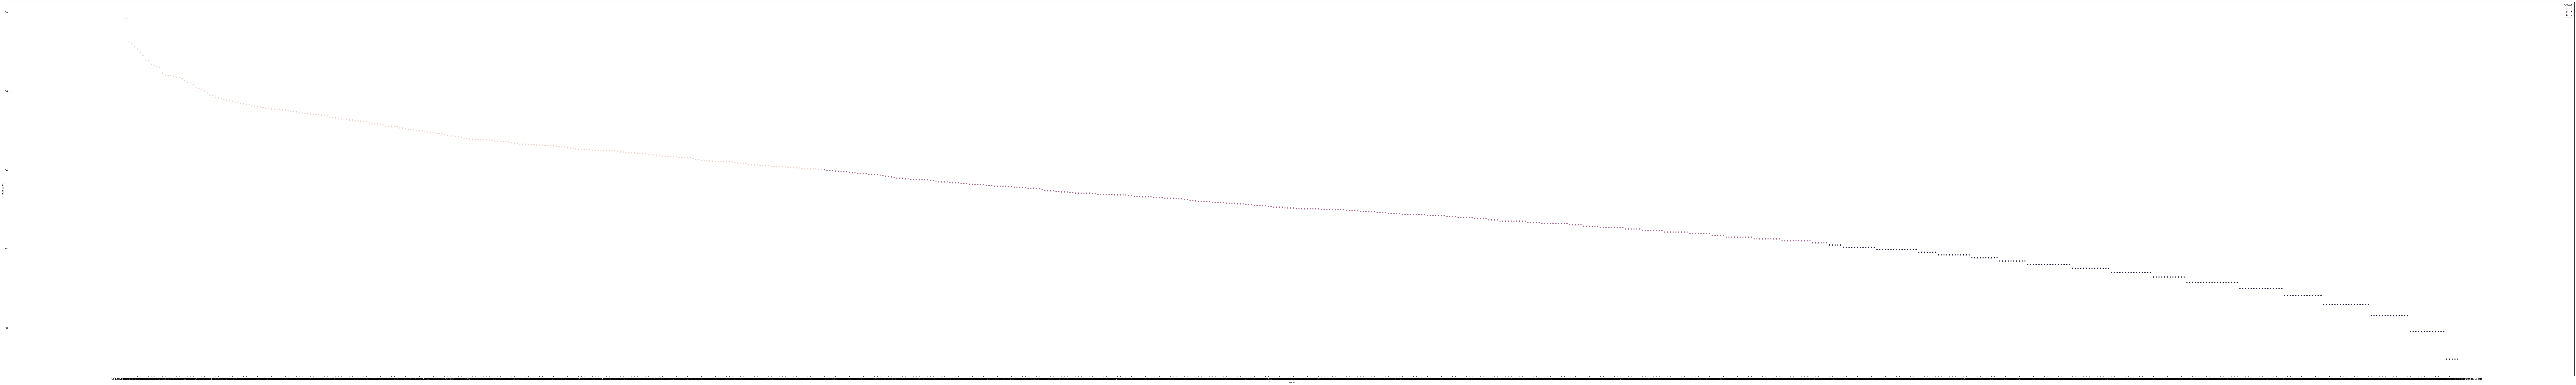

In [340]:
plt.figure(figsize=(200, 30))
sns.scatterplot(data=b, x='Name', y='total_sales', hue='Cluster')